## Importing Libraries

In [1]:
#importing libraries and filtering out the warnings
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# check the present work directory
os.getcwd()

'C:\\Users\\Mohan Uppu\\Desktop\\Upgrad DS Practice\\Credit EDA Case Study'

## Setting the display properties; as data file is large in size

In [3]:
# as the data file size of applicatiion.csv is large setting the output boundaries
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width',200)

## Reading the datasets

In [4]:
#assigned application data file to a data frame
applicants=pd.read_csv("application_data.csv",header=0)
prior_applications=pd.read_csv("previous_application.csv",header=0)

In [5]:
# display first 5 records of the data frame
applicants.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [6]:
prior_applications.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
type(applicants)

pandas.core.frame.DataFrame

In [8]:
type(prior_applications)

pandas.core.frame.DataFrame

## understanding the dataset

In [9]:
# check the shape of the application data frame
applicants.shape
# 3,07,511 rows and 122 columns

(307511, 122)

In [10]:
prior_applications.shape

(1670214, 37)

In [11]:
# How to check if the column data types
applicants.info(122)
# notice there are only 3 type of data type in this data file - int64, float64, object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   SK_ID_CURR                    int64  
 1   TARGET                        int64  
 2   NAME_CONTRACT_TYPE            object 
 3   CODE_GENDER                   object 
 4   FLAG_OWN_CAR                  object 
 5   FLAG_OWN_REALTY               object 
 6   CNT_CHILDREN                  int64  
 7   AMT_INCOME_TOTAL              float64
 8   AMT_CREDIT                    float64
 9   AMT_ANNUITY                   float64
 10  AMT_GOODS_PRICE               float64
 11  NAME_TYPE_SUITE               object 
 12  NAME_INCOME_TYPE              object 
 13  NAME_EDUCATION_TYPE           object 
 14  NAME_FAMILY_STATUS            object 
 15  NAME_HOUSING_TYPE             object 
 16  REGION_POPULATION_RELATIVE    float64
 17  DAYS_BIRTH                    int64  
 18  DAYS_EMPLOYED          

In [12]:
prior_applications.info(37)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [13]:
#Checking if the column is categorical or numerical by finding the number of unique values
applicants.nunique().sort_values()

LIVE_CITY_NOT_WORK_CITY              2
FLAG_DOCUMENT_18                     2
FLAG_DOCUMENT_14                     2
FLAG_MOBIL                           2
FLAG_EMP_PHONE                       2
FLAG_WORK_PHONE                      2
FLAG_CONT_MOBILE                     2
FLAG_PHONE                           2
FLAG_EMAIL                           2
FLAG_DOCUMENT_15                     2
FLAG_DOCUMENT_16                     2
FLAG_DOCUMENT_17                     2
EMERGENCYSTATE_MODE                  2
REG_CITY_NOT_WORK_CITY               2
REG_CITY_NOT_LIVE_CITY               2
REG_REGION_NOT_LIVE_REGION           2
FLAG_DOCUMENT_19                     2
REG_REGION_NOT_WORK_REGION           2
FLAG_DOCUMENT_20                     2
FLAG_DOCUMENT_13                     2
TARGET                               2
NAME_CONTRACT_TYPE                   2
FLAG_DOCUMENT_2                      2
FLAG_OWN_CAR                         2
FLAG_OWN_REALTY                      2
FLAG_DOCUMENT_3          

In [14]:
prior_applications.nunique().sort_values()

NFLAG_INSURED_ON_APPROVAL            2
NFLAG_LAST_APPL_IN_DAY               2
FLAG_LAST_APPL_PER_CONTRACT          2
NAME_PRODUCT_TYPE                    3
NAME_CLIENT_TYPE                     4
NAME_CONTRACT_STATUS                 4
NAME_PAYMENT_TYPE                    4
NAME_CONTRACT_TYPE                   4
NAME_PORTFOLIO                       5
NAME_YIELD_GROUP                     5
WEEKDAY_APPR_PROCESS_START           7
NAME_TYPE_SUITE                      7
CHANNEL_TYPE                         8
CODE_REJECT_REASON                   9
NAME_SELLER_INDUSTRY                11
PRODUCT_COMBINATION                 17
HOUR_APPR_PROCESS_START             24
RATE_INTEREST_PRIVILEGED            25
NAME_CASH_LOAN_PURPOSE              25
NAME_GOODS_CATEGORY                 28
CNT_PAYMENT                         49
RATE_INTEREST_PRIMARY              148
SELLERPLACE_AREA                  2097
DAYS_TERMINATION                  2830
DAYS_FIRST_DRAWING                2838
DAYS_LAST_DUE            

In [15]:
# Finding the percentage of null values in the columns
round(applicants.isnull().sum()/len(applicants) * 100,3)

SK_ID_CURR                       0.000
TARGET                           0.000
NAME_CONTRACT_TYPE               0.000
CODE_GENDER                      0.000
FLAG_OWN_CAR                     0.000
FLAG_OWN_REALTY                  0.000
CNT_CHILDREN                     0.000
AMT_INCOME_TOTAL                 0.000
AMT_CREDIT                       0.000
AMT_ANNUITY                      0.004
AMT_GOODS_PRICE                  0.090
NAME_TYPE_SUITE                  0.420
NAME_INCOME_TYPE                 0.000
NAME_EDUCATION_TYPE              0.000
NAME_FAMILY_STATUS               0.000
NAME_HOUSING_TYPE                0.000
REGION_POPULATION_RELATIVE       0.000
DAYS_BIRTH                       0.000
DAYS_EMPLOYED                    0.000
DAYS_REGISTRATION                0.000
DAYS_ID_PUBLISH                  0.000
OWN_CAR_AGE                     65.991
FLAG_MOBIL                       0.000
FLAG_EMP_PHONE                   0.000
FLAG_WORK_PHONE                  0.000
FLAG_CONT_MOBILE         

In [16]:
round(prior_applications.isnull().sum()/len(prior_applications) * 100,3)

SK_ID_PREV                      0.000
SK_ID_CURR                      0.000
NAME_CONTRACT_TYPE              0.000
AMT_ANNUITY                    22.287
AMT_APPLICATION                 0.000
AMT_CREDIT                      0.000
AMT_DOWN_PAYMENT               53.636
AMT_GOODS_PRICE                23.082
WEEKDAY_APPR_PROCESS_START      0.000
HOUR_APPR_PROCESS_START         0.000
FLAG_LAST_APPL_PER_CONTRACT     0.000
NFLAG_LAST_APPL_IN_DAY          0.000
RATE_DOWN_PAYMENT              53.636
RATE_INTEREST_PRIMARY          99.644
RATE_INTEREST_PRIVILEGED       99.644
NAME_CASH_LOAN_PURPOSE          0.000
NAME_CONTRACT_STATUS            0.000
DAYS_DECISION                   0.000
NAME_PAYMENT_TYPE               0.000
CODE_REJECT_REASON              0.000
NAME_TYPE_SUITE                49.120
NAME_CLIENT_TYPE                0.000
NAME_GOODS_CATEGORY             0.000
NAME_PORTFOLIO                  0.000
NAME_PRODUCT_TYPE               0.000
CHANNEL_TYPE                    0.000
SELLERPLACE_

In [17]:
round(applicants.isnull().mean(),3)

SK_ID_CURR                      0.000
TARGET                          0.000
NAME_CONTRACT_TYPE              0.000
CODE_GENDER                     0.000
FLAG_OWN_CAR                    0.000
FLAG_OWN_REALTY                 0.000
CNT_CHILDREN                    0.000
AMT_INCOME_TOTAL                0.000
AMT_CREDIT                      0.000
AMT_ANNUITY                     0.000
AMT_GOODS_PRICE                 0.001
NAME_TYPE_SUITE                 0.004
NAME_INCOME_TYPE                0.000
NAME_EDUCATION_TYPE             0.000
NAME_FAMILY_STATUS              0.000
NAME_HOUSING_TYPE               0.000
REGION_POPULATION_RELATIVE      0.000
DAYS_BIRTH                      0.000
DAYS_EMPLOYED                   0.000
DAYS_REGISTRATION               0.000
DAYS_ID_PUBLISH                 0.000
OWN_CAR_AGE                     0.660
FLAG_MOBIL                      0.000
FLAG_EMP_PHONE                  0.000
FLAG_WORK_PHONE                 0.000
FLAG_CONT_MOBILE                0.000
FLAG_PHONE  

In [18]:
round(prior_applications.isnull().mean(),3)

SK_ID_PREV                     0.000
SK_ID_CURR                     0.000
NAME_CONTRACT_TYPE             0.000
AMT_ANNUITY                    0.223
AMT_APPLICATION                0.000
AMT_CREDIT                     0.000
AMT_DOWN_PAYMENT               0.536
AMT_GOODS_PRICE                0.231
WEEKDAY_APPR_PROCESS_START     0.000
HOUR_APPR_PROCESS_START        0.000
FLAG_LAST_APPL_PER_CONTRACT    0.000
NFLAG_LAST_APPL_IN_DAY         0.000
RATE_DOWN_PAYMENT              0.536
RATE_INTEREST_PRIMARY          0.996
RATE_INTEREST_PRIVILEGED       0.996
NAME_CASH_LOAN_PURPOSE         0.000
NAME_CONTRACT_STATUS           0.000
DAYS_DECISION                  0.000
NAME_PAYMENT_TYPE              0.000
CODE_REJECT_REASON             0.000
NAME_TYPE_SUITE                0.491
NAME_CLIENT_TYPE               0.000
NAME_GOODS_CATEGORY            0.000
NAME_PORTFOLIO                 0.000
NAME_PRODUCT_TYPE              0.000
CHANNEL_TYPE                   0.000
SELLERPLACE_AREA               0.000
N

# Data Quality check
### dropping all the columns whose missing values are greater than 50%

In [19]:
applicants_new = applicants.loc[:, applicants.isnull().mean() <= .5]

In [20]:
prior_applications_new=prior_applications.loc[:, prior_applications.isnull().mean() <= .4]

In [21]:
applicants_new.info()
# inital size of the file was 286 MB after the droping all the columns (49 columns) with more than 40% of null values the size is 190 MB 
# which is 41% reduction  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [22]:
prior_applications_new.info()
# inital size of the file was 471 MB after the droping all the columns (11 columns) with more than 40% of null values the size is 331 MB 
# which is 30% reduction  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [23]:
# verify the new dataset with null columns
round(applicants_new.isnull().mean(),3)
# all columns starting with name FLAG_DOCUMENT can be dropped

SK_ID_CURR                      0.000
TARGET                          0.000
NAME_CONTRACT_TYPE              0.000
CODE_GENDER                     0.000
FLAG_OWN_CAR                    0.000
FLAG_OWN_REALTY                 0.000
CNT_CHILDREN                    0.000
AMT_INCOME_TOTAL                0.000
AMT_CREDIT                      0.000
AMT_ANNUITY                     0.000
AMT_GOODS_PRICE                 0.001
NAME_TYPE_SUITE                 0.004
NAME_INCOME_TYPE                0.000
NAME_EDUCATION_TYPE             0.000
NAME_FAMILY_STATUS              0.000
NAME_HOUSING_TYPE               0.000
REGION_POPULATION_RELATIVE      0.000
DAYS_BIRTH                      0.000
DAYS_EMPLOYED                   0.000
DAYS_REGISTRATION               0.000
DAYS_ID_PUBLISH                 0.000
FLAG_MOBIL                      0.000
FLAG_EMP_PHONE                  0.000
FLAG_WORK_PHONE                 0.000
FLAG_CONT_MOBILE                0.000
FLAG_PHONE                      0.000
FLAG_EMAIL  

In [24]:
round(prior_applications_new.isnull().mean(),3)

SK_ID_PREV                     0.000
SK_ID_CURR                     0.000
NAME_CONTRACT_TYPE             0.000
AMT_ANNUITY                    0.223
AMT_APPLICATION                0.000
AMT_CREDIT                     0.000
AMT_GOODS_PRICE                0.231
WEEKDAY_APPR_PROCESS_START     0.000
HOUR_APPR_PROCESS_START        0.000
FLAG_LAST_APPL_PER_CONTRACT    0.000
NFLAG_LAST_APPL_IN_DAY         0.000
NAME_CASH_LOAN_PURPOSE         0.000
NAME_CONTRACT_STATUS           0.000
DAYS_DECISION                  0.000
NAME_PAYMENT_TYPE              0.000
CODE_REJECT_REASON             0.000
NAME_CLIENT_TYPE               0.000
NAME_GOODS_CATEGORY            0.000
NAME_PORTFOLIO                 0.000
NAME_PRODUCT_TYPE              0.000
CHANNEL_TYPE                   0.000
SELLERPLACE_AREA               0.000
NAME_SELLER_INDUSTRY           0.000
CNT_PAYMENT                    0.223
NAME_YIELD_GROUP               0.000
PRODUCT_COMBINATION            0.000
dtype: float64

In [25]:
applicants_new.shape

(307511, 81)

In [26]:
prior_applications_new.shape

(1670214, 26)

In [27]:
# display column names
applicants_new.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START', 'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'YEARS_BEGINEXPLUATATION_AVG', 'FLOORSMAX_AVG',
       'YEARS_BEGINEXPLUATATION_MODE', 'FLOORSMAX_MODE', 'Y

In [28]:
applicants.nunique().sort_values()
# column names with FlAG_DOCUMENT contain only 2 possible values which indicate the different documents proved by the applicant

LIVE_CITY_NOT_WORK_CITY              2
FLAG_DOCUMENT_18                     2
FLAG_DOCUMENT_14                     2
FLAG_MOBIL                           2
FLAG_EMP_PHONE                       2
FLAG_WORK_PHONE                      2
FLAG_CONT_MOBILE                     2
FLAG_PHONE                           2
FLAG_EMAIL                           2
FLAG_DOCUMENT_15                     2
FLAG_DOCUMENT_16                     2
FLAG_DOCUMENT_17                     2
EMERGENCYSTATE_MODE                  2
REG_CITY_NOT_WORK_CITY               2
REG_CITY_NOT_LIVE_CITY               2
REG_REGION_NOT_LIVE_REGION           2
FLAG_DOCUMENT_19                     2
REG_REGION_NOT_WORK_REGION           2
FLAG_DOCUMENT_20                     2
FLAG_DOCUMENT_13                     2
TARGET                               2
NAME_CONTRACT_TYPE                   2
FLAG_DOCUMENT_2                      2
FLAG_OWN_CAR                         2
FLAG_OWN_REALTY                      2
FLAG_DOCUMENT_3          

In [29]:
# check the data content for flag_document columns
# all these columns can be dropped as they dont any additional value in dertermining the approval or denial of applicant loans
applicants_new[['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',
               'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 
               'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 
               'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']]

,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
307507,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307508,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
307509,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [30]:
FLAG_DOCUMENT_COL=['FLAG_DOCUMENT_2', 'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5', 'FLAG_DOCUMENT_6','FLAG_DOCUMENT_7',
               'FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 
               'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17', 'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 
               'FLAG_DOCUMENT_20', 'FLAG_DOCUMENT_21']

In [31]:
# Dropping the flag_doument columns
applicants_new.drop(columns=FLAG_DOCUMENT_COL, inplace= True)

In [32]:
applicants_new.info()
# further more review needed to check which all the columns are needed to check 
# the possiblity of approval or rejection byt the bank

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 61 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [33]:
# the below columns do not make any contribution to the applicants 
applicants_new[['DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START', 
             'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 
			 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','FLAG_CONT_MOBILE','FLAG_PHONE', 'REGION_POPULATION_RELATIVE', 
             'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 
             'DAYS_LAST_PHONE_CHANGE']] 

,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,FLAG_CONT_MOBILE,FLAG_PHONE,REGION_POPULATION_RELATIVE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE
0,-637,-3648.0,-2120,WEDNESDAY,10,0,0,0,0,0,0,1,1,0.018801,2.0,2.0,2.0,2.0,-1134.0
1,-1188,-1186.0,-291,MONDAY,11,0,0,0,0,0,0,1,1,0.003541,1.0,0.0,1.0,0.0,-828.0
2,-225,-4260.0,-2531,MONDAY,9,0,0,0,0,0,0,1,1,0.010032,0.0,0.0,0.0,0.0,-815.0
3,-3039,-9833.0,-2437,WEDNESDAY,17,0,0,0,0,0,0,1,0,0.008019,2.0,0.0,2.0,0.0,-617.0
4,-3038,-4311.0,-3458,THURSDAY,11,0,0,0,0,1,1,1,0,0.028663,0.0,0.0,0.0,0.0,-1106.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,-236,-8456.0,-1982,THURSDAY,15,0,0,0,0,0,0,1,0,0.032561,0.0,0.0,0.0,0.0,-273.0
307507,365243,-4388.0,-4090,MONDAY,8,0,0,0,0,0,0,1,1,0.025164,0.0,0.0,0.0,0.0,0.0
307508,-7921,-6737.0,-5150,THURSDAY,9,0,0,0,0,1,1,1,0,0.005002,6.0,0.0,6.0,0.0,-1909.0
307509,-4786,-2562.0,-931,WEDNESDAY,9,0,0,0,1,1,0,1,0,0.005313,0.0,0.0,0.0,0.0,-322.0


In [34]:
MISC_COL=['DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START', 
             'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY', 
			 'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY','FLAG_CONT_MOBILE','FLAG_PHONE', 'REGION_POPULATION_RELATIVE', 
             'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 
             'DAYS_LAST_PHONE_CHANGE']

In [35]:
# Dropping the miscellaneous columns
applicants_new.drop(columns=MISC_COL, inplace= True)

In [36]:
applicants_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 42 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [37]:
#Checking for percentage of null values
round(applicants_new.isnull().sum()/len(applicants_new) * 100,3)
# notice there are still columns from number of enquires to Credit bureau with null values

SK_ID_CURR                       0.000
TARGET                           0.000
NAME_CONTRACT_TYPE               0.000
CODE_GENDER                      0.000
FLAG_OWN_CAR                     0.000
FLAG_OWN_REALTY                  0.000
CNT_CHILDREN                     0.000
AMT_INCOME_TOTAL                 0.000
AMT_CREDIT                       0.000
AMT_ANNUITY                      0.004
AMT_GOODS_PRICE                  0.090
NAME_TYPE_SUITE                  0.420
NAME_INCOME_TYPE                 0.000
NAME_EDUCATION_TYPE              0.000
NAME_FAMILY_STATUS               0.000
NAME_HOUSING_TYPE                0.000
DAYS_BIRTH                       0.000
FLAG_MOBIL                       0.000
FLAG_EMP_PHONE                   0.000
FLAG_WORK_PHONE                  0.000
FLAG_EMAIL                       0.000
OCCUPATION_TYPE                 31.346
CNT_FAM_MEMBERS                  0.001
REGION_RATING_CLIENT             0.000
REGION_RATING_CLIENT_W_CITY      0.000
ORGANIZATION_TYPE        

In [38]:
applicants_new.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()
# total number of rows 307511 of these 264366 rows; that is 85% of the values are zero and remaining 13% are nulls. 
# by this observation we dont think this column is required.

0.0    264366
1.0      1560
2.0        56
3.0         9
4.0         1
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [39]:
applicants_new.AMT_REQ_CREDIT_BUREAU_DAY .value_counts()

0.0    264503
1.0      1292
2.0       106
3.0        45
4.0        26
5.0         9
6.0         8
9.0         2
8.0         1
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [40]:
applicants_new.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts()

0.0    257456
1.0      8208
2.0       199
3.0        58
4.0        34
6.0        20
5.0        10
8.0         5
7.0         2
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [41]:
applicants_new.AMT_REQ_CREDIT_BUREAU_MON.value_counts()


0.0     222233
1.0      33147
2.0       5386
3.0       1991
4.0       1076
5.0        602
6.0        343
7.0        298
9.0        206
8.0        185
10.0       132
11.0       119
12.0        77
13.0        72
14.0        40
15.0        35
16.0        23
17.0        14
18.0         6
19.0         3
24.0         1
27.0         1
22.0         1
23.0         1
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: int64

In [42]:
applicants_new.AMT_REQ_CREDIT_BUREAU_QRT.value_counts()


0.0      215417
1.0       33862
2.0       14412
3.0        1717
4.0         476
5.0          64
6.0          28
7.0           7
8.0           7
19.0          1
261.0         1
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: int64

In [43]:
applicants_new.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()
# based this assesment we would recommend to keep columsn AMT_REQ_CREDIT_BUREAU_YEAR and AMT_REQ_CREDIT_BUREAU_MON and 
# drop the rest of credit bureau columns

0.0     71801
1.0     63405
2.0     50192
3.0     33628
4.0     20714
5.0     12052
6.0      6967
7.0      3869
8.0      2127
9.0      1096
11.0       31
12.0       30
10.0       22
13.0       19
14.0       10
17.0        7
15.0        6
19.0        4
18.0        4
16.0        3
21.0        1
23.0        1
25.0        1
20.0        1
22.0        1
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [44]:
CREDIT_BUREAU_COL=['AMT_REQ_CREDIT_BUREAU_HOUR','AMT_REQ_CREDIT_BUREAU_DAY',
                   'AMT_REQ_CREDIT_BUREAU_WEEK','AMT_REQ_CREDIT_BUREAU_QRT']

In [45]:
# Dropping the CREDIT_BUREAU columns
applicants_new.drop(columns=CREDIT_BUREAU_COL, inplace= True)

In [46]:
applicants_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 38 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   SK_ID_CURR                    307511 non-null  int64  
 1   TARGET                        307511 non-null  int64  
 2   NAME_CONTRACT_TYPE            307511 non-null  object 
 3   CODE_GENDER                   307511 non-null  object 
 4   FLAG_OWN_CAR                  307511 non-null  object 
 5   FLAG_OWN_REALTY               307511 non-null  object 
 6   CNT_CHILDREN                  307511 non-null  int64  
 7   AMT_INCOME_TOTAL              307511 non-null  float64
 8   AMT_CREDIT                    307511 non-null  float64
 9   AMT_ANNUITY                   307499 non-null  float64
 10  AMT_GOODS_PRICE               307233 non-null  float64
 11  NAME_TYPE_SUITE               306219 non-null  object 
 12  NAME_INCOME_TYPE              307511 non-nul

In [47]:
# below list of columns describe the comparitive value of applicants living space. we are not sure how these values impact 
# the decision process of loan approval more over 40% of these values are null; we would recommend to drop these columns for now
applicants_new[['YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MODE','FLOORSMAX_MODE',
'YEARS_BEGINEXPLUATATION_MEDI','FLOORSMAX_MEDI','TOTALAREA_MODE','EMERGENCYSTATE_MODE']]

,YEARS_BEGINEXPLUATATION_AVG,FLOORSMAX_AVG,YEARS_BEGINEXPLUATATION_MODE,FLOORSMAX_MODE,YEARS_BEGINEXPLUATATION_MEDI,FLOORSMAX_MEDI,TOTALAREA_MODE,EMERGENCYSTATE_MODE
0,0.9722,0.0833,0.9722,0.0833,0.9722,0.0833,0.0149,No
1,0.9851,0.2917,0.9851,0.2917,0.9851,0.2917,0.0714,No
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
307506,0.9876,0.6042,0.9782,0.4583,0.9876,0.6042,0.2898,No
307507,0.9727,0.0833,0.9727,0.0833,0.9727,0.0833,0.0214,No
307508,0.9816,0.1667,0.9816,0.1667,0.9816,0.1667,0.7970,No
307509,0.9771,0.0417,0.9772,0.0417,0.9771,0.0417,0.0086,No


In [48]:
BUILDING_SPACE_COL=['YEARS_BEGINEXPLUATATION_AVG','FLOORSMAX_AVG','YEARS_BEGINEXPLUATATION_MODE','FLOORSMAX_MODE',
'YEARS_BEGINEXPLUATATION_MEDI','FLOORSMAX_MEDI','TOTALAREA_MODE','EMERGENCYSTATE_MODE']

In [49]:
# Dropping the CREDIT_BUREAU columns
applicants_new.drop(columns=BUILDING_SPACE_COL, inplace= True)

In [50]:
applicants_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 30 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [51]:
#Checking for percentage of null values
round(applicants_new.isnull().sum()/len(applicants_new) * 100,3)

SK_ID_CURR                      0.000
TARGET                          0.000
NAME_CONTRACT_TYPE              0.000
CODE_GENDER                     0.000
FLAG_OWN_CAR                    0.000
FLAG_OWN_REALTY                 0.000
CNT_CHILDREN                    0.000
AMT_INCOME_TOTAL                0.000
AMT_CREDIT                      0.000
AMT_ANNUITY                     0.004
AMT_GOODS_PRICE                 0.090
NAME_TYPE_SUITE                 0.420
NAME_INCOME_TYPE                0.000
NAME_EDUCATION_TYPE             0.000
NAME_FAMILY_STATUS              0.000
NAME_HOUSING_TYPE               0.000
DAYS_BIRTH                      0.000
FLAG_MOBIL                      0.000
FLAG_EMP_PHONE                  0.000
FLAG_WORK_PHONE                 0.000
FLAG_EMAIL                      0.000
OCCUPATION_TYPE                31.346
CNT_FAM_MEMBERS                 0.001
REGION_RATING_CLIENT            0.000
REGION_RATING_CLIENT_W_CITY     0.000
ORGANIZATION_TYPE               0.000
EXT_SOURCE_2

In [52]:
# NAME_TYPE_SUIT 'Who was accompanying client when he was applying for the loan' 
applicants_new['NAME_TYPE_SUITE'].unique()

array(['Unaccompanied', 'Family', 'Spouse, partner', 'Children',
       'Other_A', nan, 'Other_B', 'Group of people'], dtype=object)

In [53]:
applicants_new.NAME_TYPE_SUITE.value_counts()
# based on the observation of the data i dont think we need this column in evulating the loan approval or denial of an applicant
# drop this column

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [54]:
applicants_new.drop(columns='NAME_TYPE_SUITE', inplace= True)

In [55]:
applicants_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

In [56]:
#Checking for percentage of null values
round(applicants_new.isnull().sum()/len(applicants_new) * 100,3)

SK_ID_CURR                      0.000
TARGET                          0.000
NAME_CONTRACT_TYPE              0.000
CODE_GENDER                     0.000
FLAG_OWN_CAR                    0.000
FLAG_OWN_REALTY                 0.000
CNT_CHILDREN                    0.000
AMT_INCOME_TOTAL                0.000
AMT_CREDIT                      0.000
AMT_ANNUITY                     0.004
AMT_GOODS_PRICE                 0.090
NAME_INCOME_TYPE                0.000
NAME_EDUCATION_TYPE             0.000
NAME_FAMILY_STATUS              0.000
NAME_HOUSING_TYPE               0.000
DAYS_BIRTH                      0.000
FLAG_MOBIL                      0.000
FLAG_EMP_PHONE                  0.000
FLAG_WORK_PHONE                 0.000
FLAG_EMAIL                      0.000
OCCUPATION_TYPE                31.346
CNT_FAM_MEMBERS                 0.001
REGION_RATING_CLIENT            0.000
REGION_RATING_CLIENT_W_CITY     0.000
ORGANIZATION_TYPE               0.000
EXT_SOURCE_2                    0.215
EXT_SOURCE_3

In [57]:
prior_applications_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [58]:
round(prior_applications_new.isnull().sum()/len(prior_applications_new) * 100,3)

SK_ID_PREV                      0.000
SK_ID_CURR                      0.000
NAME_CONTRACT_TYPE              0.000
AMT_ANNUITY                    22.287
AMT_APPLICATION                 0.000
AMT_CREDIT                      0.000
AMT_GOODS_PRICE                23.082
WEEKDAY_APPR_PROCESS_START      0.000
HOUR_APPR_PROCESS_START         0.000
FLAG_LAST_APPL_PER_CONTRACT     0.000
NFLAG_LAST_APPL_IN_DAY          0.000
NAME_CASH_LOAN_PURPOSE          0.000
NAME_CONTRACT_STATUS            0.000
DAYS_DECISION                   0.000
NAME_PAYMENT_TYPE               0.000
CODE_REJECT_REASON              0.000
NAME_CLIENT_TYPE                0.000
NAME_GOODS_CATEGORY             0.000
NAME_PORTFOLIO                  0.000
NAME_PRODUCT_TYPE               0.000
CHANNEL_TYPE                    0.000
SELLERPLACE_AREA                0.000
NAME_SELLER_INDUSTRY            0.000
CNT_PAYMENT                    22.286
NAME_YIELD_GROUP                0.000
PRODUCT_COMBINATION             0.021
dtype: float

In [59]:
prior_applications_new.nunique().sort_values()

FLAG_LAST_APPL_PER_CONTRACT          2
NFLAG_LAST_APPL_IN_DAY               2
NAME_PRODUCT_TYPE                    3
NAME_CONTRACT_STATUS                 4
NAME_CONTRACT_TYPE                   4
NAME_CLIENT_TYPE                     4
NAME_PAYMENT_TYPE                    4
NAME_PORTFOLIO                       5
NAME_YIELD_GROUP                     5
WEEKDAY_APPR_PROCESS_START           7
CHANNEL_TYPE                         8
CODE_REJECT_REASON                   9
NAME_SELLER_INDUSTRY                11
PRODUCT_COMBINATION                 17
HOUR_APPR_PROCESS_START             24
NAME_CASH_LOAN_PURPOSE              25
NAME_GOODS_CATEGORY                 28
CNT_PAYMENT                         49
SELLERPLACE_AREA                  2097
DAYS_DECISION                     2922
AMT_CREDIT                       86803
AMT_GOODS_PRICE                  93885
AMT_APPLICATION                  93885
SK_ID_CURR                      338857
AMT_ANNUITY                     357959
SK_ID_PREV               

In [60]:
prior_applications_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 26 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [61]:
applicants_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 29 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

In [62]:
applicants_new.nunique().sort_values()

FLAG_WORK_PHONE                     2
TARGET                              2
NAME_CONTRACT_TYPE                  2
FLAG_OWN_CAR                        2
FLAG_OWN_REALTY                     2
FLAG_MOBIL                          2
FLAG_EMP_PHONE                      2
FLAG_EMAIL                          2
CODE_GENDER                         3
REGION_RATING_CLIENT_W_CITY         3
REGION_RATING_CLIENT                3
NAME_EDUCATION_TYPE                 5
NAME_FAMILY_STATUS                  6
NAME_HOUSING_TYPE                   6
NAME_INCOME_TYPE                    8
CNT_CHILDREN                       15
CNT_FAM_MEMBERS                    17
OCCUPATION_TYPE                    18
AMT_REQ_CREDIT_BUREAU_MON          24
AMT_REQ_CREDIT_BUREAU_YEAR         25
ORGANIZATION_TYPE                  58
EXT_SOURCE_3                      814
AMT_GOODS_PRICE                  1002
AMT_INCOME_TOTAL                 2548
AMT_CREDIT                       5603
AMT_ANNUITY                     13672
DAYS_BIRTH  

In [63]:
applicants_new.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [64]:
applicants_new.DAYS_BIRTH

0         -9461
1        -16765
2        -19046
3        -19005
4        -19932
          ...  
307506    -9327
307507   -20775
307508   -14966
307509   -11961
307510   -16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64

In [65]:
# Dropping the REGION_RATING_CLIENT_W_CITY, REGION_RATING_CLIENT columns as these columns do not add any value in determining 
# loan approval process.
applicants_new.drop(columns=['REGION_RATING_CLIENT_W_CITY','REGION_RATING_CLIENT'], inplace= True)

In [66]:
applicants_new['AMT_GOODS_PRICE'].isnull().sum()
# there 278 null values 

278

In [67]:
applicants_new[applicants_new['AMT_GOODS_PRICE'].isnull()]
# we would prefer to use Credit amount instead of goods amount as there are no NA in AMT_CREDIT field. 
# for now we can zero all the Nulls to zero

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR
724,100837,0,Revolving loans,F,N,Y,2,45000.0,135000.0,6750.0,NaN,Commercial associate,Secondary / secondary special,Married,House / apartment,-10072,1,1,1,0,Core staff,4.0,Kindergarten,0.378174,NaN,NaN,NaN
5937,106955,0,Revolving loans,F,N,N,0,157500.0,450000.0,22500.0,NaN,Working,Secondary / secondary special,Married,House / apartment,-11993,1,1,1,1,Private service staff,2.0,Business Entity Type 3,0.464614,0.537070,0.0,2.0
6425,107494,0,Revolving loans,F,N,N,0,67500.0,202500.0,10125.0,NaN,Working,Higher education,Married,House / apartment,-9727,1,1,1,0,Accountants,2.0,Trade: type 7,0.565849,NaN,NaN,NaN
6703,107822,0,Revolving loans,F,N,N,1,121500.0,180000.0,9000.0,NaN,Working,Secondary / secondary special,Civil marriage,House / apartment,-11079,1,1,1,0,Managers,3.0,Government,0.645519,0.863363,0.0,0.0
7647,108913,0,Revolving loans,M,N,Y,0,180000.0,450000.0,22500.0,NaN,Working,Higher education,Single / not married,House / apartment,-9986,1,1,1,0,Security staff,1.0,Construction,0.552557,0.661024,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304678,452992,0,Revolving loans,F,N,Y,2,67500.0,202500.0,10125.0,NaN,Working,Higher education,Married,House / apartment,-11313,1,1,1,0,Sales staff,4.0,Business Entity Type 3,0.449139,0.574447,0.0,1.0
304784,453120,0,Revolving loans,M,N,Y,1,112500.0,270000.0,13500.0,NaN,Working,Secondary / secondary special,Married,House / apartment,-16870,1,1,1,0,Drivers,3.0,Self-employed,0.441976,0.459690,0.0,0.0
305833,454341,0,Revolving loans,F,N,Y,0,126000.0,270000.0,13500.0,NaN,Working,Incomplete higher,Single / not married,With parents,-10440,1,1,1,0,Core staff,1.0,Self-employed,0.480353,0.698668,0.0,2.0
306126,454683,0,Revolving loans,M,N,Y,0,135000.0,270000.0,13500.0,NaN,Commercial associate,Secondary / secondary special,Married,Municipal apartment,-15406,1,1,1,0,NaN,2.0,Security,0.675154,0.321735,0.0,3.0


In [68]:
applicants_new['AMT_INCOME_TOTAL'].isnull().sum()

0

In [69]:
applicants_new['AMT_CREDIT'].isnull().sum()

0

In [70]:
applicants_new['AMT_ANNUITY'].isnull().sum()

12

In [71]:
applicants_new[applicants_new['AMT_ANNUITY'].isnull()]

# not unsure for this issue; how can we have credit amount but not loan annunity; as we decided to use credit amount
# for now i will zero all the null values

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR
47531,155054,0,Cash loans,M,N,N,0,180000.0,450000.0,NaN,450000.0,Commercial associate,Incomplete higher,Single / not married,House / apartment,-10668,1,1,1,0,High skill tech staff,1.0,Business Entity Type 3,0.626896,0.372334,0.0,1.0
50035,157917,0,Cash loans,F,N,N,0,94500.0,450000.0,NaN,450000.0,Working,Lower secondary,Civil marriage,House / apartment,-9027,1,1,1,0,Laborers,2.0,Business Entity Type 1,0.727274,0.468660,1.0,1.0
51594,159744,0,Cash loans,F,N,N,0,202500.0,539100.0,NaN,450000.0,Working,Secondary / secondary special,Married,House / apartment,-17376,1,1,0,0,Cooking staff,2.0,Self-employed,0.738370,0.452534,1.0,1.0
55025,163757,0,Cash loans,F,N,N,0,162000.0,296280.0,NaN,225000.0,State servant,Higher education,Married,House / apartment,-11329,1,1,0,0,Core staff,2.0,Government,0.566316,0.220095,1.0,4.0
59934,169487,0,Cash loans,M,Y,N,0,202500.0,360000.0,NaN,360000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-19762,1,1,1,0,Laborers,1.0,Other,0.583947,0.177704,0.0,6.0
75873,187985,0,Cash loans,M,Y,N,0,144000.0,219249.0,NaN,166500.0,Working,Higher education,Single / not married,Rented apartment,-20831,1,1,0,0,Drivers,1.0,Business Entity Type 3,0.667564,0.425893,0.0,11.0
89343,203726,0,Cash loans,F,Y,N,0,90000.0,157500.0,NaN,157500.0,State servant,Secondary / secondary special,Married,House / apartment,-12134,1,1,0,0,Medicine staff,2.0,Medicine,0.154811,0.297087,2.0,0.0
123872,243648,0,Cash loans,F,N,Y,0,202500.0,929088.0,NaN,720000.0,Working,Secondary / secondary special,Civil marriage,House / apartment,-13902,1,1,0,1,Secretaries,2.0,Self-employed,0.510934,0.581484,0.0,5.0
207186,340147,0,Cash loans,M,N,N,0,171000.0,486000.0,NaN,486000.0,Commercial associate,Higher education,Married,House / apartment,-10151,1,1,0,0,Security staff,2.0,Security,0.706306,0.391055,1.0,2.0
227939,364022,0,Cash loans,F,N,Y,0,315000.0,628069.5,NaN,499500.0,Commercial associate,Higher education,Married,Municipal apartment,-16344,1,1,0,0,Sales staff,2.0,Business Entity Type 3,0.618698,0.431192,0.0,2.0


In [72]:
applicants_new[applicants_new['AMT_ANNUITY']>applicants_new['AMT_CREDIT']]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR


In [73]:
# converting data type for columns AMT_GOODS_PRICE, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY from Float to int
# replacing all 'na' values to 0
applicants_new['AMT_GOODS_PRICE'] = applicants_new['AMT_GOODS_PRICE'].fillna(0)
applicants_new['AMT_GOODS_PRICE'] = applicants_new['AMT_GOODS_PRICE'].astype(int)


In [74]:
applicants_new['AMT_INCOME_TOTAL'] = applicants_new['AMT_INCOME_TOTAL'].fillna(0)
applicants_new['AMT_INCOME_TOTAL'] = applicants_new['AMT_INCOME_TOTAL'].astype(int)
applicants_new['AMT_CREDIT'] = applicants_new['AMT_CREDIT'].fillna(0)
applicants_new['AMT_CREDIT'] = applicants_new['AMT_CREDIT'].astype(int)
applicants_new['AMT_ANNUITY'] = applicants_new['AMT_ANNUITY'].fillna(0)
applicants_new['AMT_ANNUITY'] = applicants_new['AMT_ANNUITY'].astype(int)

In [75]:
applicants_new['CNT_FAM_MEMBERS']=applicants_new['CNT_FAM_MEMBERS'].fillna(applicants_new['CNT_FAM_MEMBERS'].mode()[0])
applicants_new['AMT_REQ_CREDIT_BUREAU_YEAR']=applicants_new['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(applicants_new['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0])
applicants_new['AMT_REQ_CREDIT_BUREAU_MON']=applicants_new['AMT_REQ_CREDIT_BUREAU_MON'].fillna(applicants_new['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0])

applicants_new['CNT_FAM_MEMBERS']=applicants_new['CNT_FAM_MEMBERS'].astype(int)
applicants_new['AMT_REQ_CREDIT_BUREAU_YEAR']=applicants_new['AMT_REQ_CREDIT_BUREAU_YEAR'].astype(int)
applicants_new['AMT_REQ_CREDIT_BUREAU_MON']=applicants_new['AMT_REQ_CREDIT_BUREAU_MON'].astype(int)

# Create Buckets for Appliants Age , Children and Family

In [76]:
applicants_new['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [77]:
# replace XNA with value  'Other'
applicants_new['ORGANIZATION_TYPE'] = applicants_new['ORGANIZATION_TYPE'].replace('XNA', 'Other')

In [78]:
# Adding a new column 'AGE' to capture applicants age in years
# age in days doesnt provide much insights; we need to both age in year and age in buckets
applicants_new['AGE_YEARS']=applicants_new['DAYS_BIRTH']*(-1)/365

In [79]:
applicants_new['AGE_YEARS'] = applicants_new['AGE_YEARS'].astype(int)

In [80]:
applicants_new['AGE_YEARS'].value_counts()

38    8873
37    8799
39    8770
40    8624
36    8614
27    8476
41    8449
31    8377
43    8308
42    8216
28    7975
32    7911
44    7819
30    7806
35    7804
33    7714
29    7670
34    7631
54    7551
53    7457
46    7293
45    7205
47    7018
48    6984
56    6828
57    6768
52    6763
51    6689
55    6637
59    6631
49    6627
50    6482
58    6268
60    6227
62    5514
61    5418
63    5197
64    5117
26    4561
25    4168
23    4057
24    3905
65    3113
22    2933
66    2085
67    2042
21    1254
68     866
69      16
20       1
Name: AGE_YEARS, dtype: int64

In [81]:
# categorize applicants AGE_YEARS in different following categories - 10-20;21-30; 31-40; 41-50; 51-60; 61-70 ;71+

applicants_new['AGE_BUCKETS']=applicants_new['AGE_YEARS'].apply(lambda x: "10-20" if x>=10 and x<=20 else 
                                                                ("21-30" if x>=21 and x<=30  else
                                                                 ("31-40" if x>=31 and x<=40  else 
                                                                  ("41-50" if x>=41 and x<=50  else
                                                                   "51-60" if x>=51 and x<=60  else
                                                                   ("61-70" if x>=61 and x<=70  else
                                                                    ("71+"   if x>=71 and x<=100 else 'Unknown'))))))

In [82]:
applicants_new['AGE_BUCKETS'].value_counts()

31-40    83117
41-50    74401
51-60    67819
21-30    52805
61-70    29368
10-20        1
Name: AGE_BUCKETS, dtype: int64

In [83]:
round(applicants_new.groupby(['AGE_BUCKETS']).mean()['AMT_INCOME_TOTAL'],2)

AGE_BUCKETS
10-20    112500.00
21-30    161204.19
31-40    179710.66
41-50    180295.66
51-60    162606.35
61-70    136738.23
Name: AMT_INCOME_TOTAL, dtype: float64

In [84]:
round(applicants_new.groupby(['AGE_BUCKETS']).mean()['AMT_CREDIT'],2)

AGE_BUCKETS
10-20    297000.00
21-30    492180.53
31-40    608956.41
41-50    659994.61
51-60    642846.22
61-70    507392.50
Name: AMT_CREDIT, dtype: float64

In [85]:
applicants_new['CODE_GENDER'].value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

In [86]:
round(applicants_new.groupby(['CODE_GENDER']).mean()['AMT_INCOME_TOTAL'],2)

CODE_GENDER
F      156032.31
M      193396.48
XNA    186750.00
Name: AMT_INCOME_TOTAL, dtype: float64

In [87]:
round(applicants_new.groupby(['CODE_GENDER']).mean()['AMT_CREDIT'],2)

CODE_GENDER
F      592766.67
M      611095.15
XNA    399375.00
Name: AMT_CREDIT, dtype: float64

In [88]:
applicants_new[applicants_new.CODE_GENDER=='XNA']

# 4 of the applicants are married between age group of 21 to 60 and 2 of them have children; notice most of the appliacnts are female
# for easy of anlysis we would like to convert these 4  records gender value to 'F'

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_YEARS,AGE_BUCKETS
35657,141289,0,Revolving loans,XNA,Y,Y,0,207000,382500,19125,337500,Working,Secondary / secondary special,Married,Municipal apartment,-20232,1,1,1,0,NaN,2,Business Entity Type 1,0.295998,0.461482,0,1,55,51-60
38566,144669,0,Revolving loans,XNA,N,Y,2,157500,270000,13500,225000,Working,Secondary / secondary special,Married,House / apartment,-13717,1,1,1,0,Low-skill Laborers,4,Industry: type 3,0.709205,0.310818,3,4,37,31-40
83382,196708,0,Revolving loans,XNA,N,Y,1,135000,405000,20250,225000,Working,Higher education,Married,House / apartment,-10647,1,1,1,0,Core staff,3,Kindergarten,0.659185,0.076984,0,3,29,21-30
189640,319880,0,Revolving loans,XNA,Y,Y,0,247500,540000,27000,900000,Commercial associate,Incomplete higher,Civil marriage,House / apartment,-9649,1,1,1,0,NaN,2,Medicine,0.658620,0.360613,0,6,26,21-30


In [89]:
applicants_new.CODE_GENDER= applicants_new.CODE_GENDER.replace('XNA', 'F')

In [90]:
applicants_new.groupby('AGE_BUCKETS')['CODE_GENDER'].value_counts()

AGE_BUCKETS  CODE_GENDER
10-20        F                  1
21-30        F              30257
             M              22548
31-40        F              50906
             M              32211
41-50        F              48397
             M              26004
51-60        F              49770
             M              18049
61-70        F              23121
             M               6247
Name: CODE_GENDER, dtype: int64

In [91]:
applicants_new.CNT_CHILDREN.value_counts()

0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64

In [92]:
round(applicants_new.CNT_CHILDREN.value_counts()*100/applicants_new.shape[0],3)
# 70% of the applicants have no children but there are applicants who have more than 3 children whose monthly expenses might 
# We need a further investigation for these 555 applicants
# we would like to add a new calculated column based based on the children value - No children, <3 children and >3 children

0     70.037
1     19.875
2      8.699
3      1.209
4      0.140
5      0.027
6      0.007
7      0.002
14     0.001
19     0.001
12     0.001
10     0.001
9      0.001
8      0.001
11     0.000
Name: CNT_CHILDREN, dtype: float64

In [93]:
applicants_new[applicants_new.CNT_CHILDREN>3]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_YEARS,AGE_BUCKETS
1133,101324,0,Cash loans,F,N,Y,4,121500,1125000,32895,1125000,Working,Secondary / secondary special,Married,House / apartment,-15155,1,1,1,0,Core staff,6,Kindergarten,0.308919,0.581484,0,5,41,41-50
1721,102013,0,Cash loans,F,N,Y,4,112500,592560,40086,450000,Working,Secondary / secondary special,Married,House / apartment,-11958,1,1,0,0,Cleaning staff,6,School,0.595934,0.452534,0,0,32,31-40
2348,102747,0,Cash loans,F,N,N,4,67500,148365,11893,135000,Working,Secondary / secondary special,Married,House / apartment,-12272,1,1,1,0,Core staff,6,Transport: type 2,0.684591,0.312365,0,1,33,31-40
2666,103113,1,Revolving loans,M,Y,N,4,45000,180000,9000,180000,Working,Secondary / secondary special,Married,House / apartment,-12449,1,1,1,0,Laborers,6,Agriculture,0.499450,NaN,0,0,34,31-40
3079,103596,0,Cash loans,M,N,Y,7,85500,411813,17577,355500,Commercial associate,Secondary / secondary special,Married,House / apartment,-17676,1,1,0,0,Cleaning staff,9,Housing,0.373634,0.468660,1,1,48,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305112,453499,0,Cash loans,F,N,N,7,112500,143910,15399,135000,Working,Secondary / secondary special,Widow,House / apartment,-10940,1,1,1,0,Laborers,8,Business Entity Type 3,0.479758,0.445396,0,2,29,21-30
306244,454820,0,Cash loans,F,N,Y,4,63000,1018899,29920,850500,State servant,Secondary / secondary special,Married,House / apartment,-13442,1,1,0,0,NaN,6,Other,0.189990,NaN,0,0,36,31-40
306297,454877,1,Revolving loans,F,N,Y,4,90000,202500,10125,202500,Working,Secondary / secondary special,Married,With parents,-13271,1,1,0,0,Laborers,6,School,0.447949,NaN,0,0,36,31-40
306888,455557,0,Cash loans,F,N,Y,5,112500,896643,35689,724500,Pensioner,Secondary / secondary special,Married,House / apartment,-20746,1,0,0,0,NaN,7,Other,0.512256,NaN,0,0,56,51-60


In [94]:
applicants_new['CHILDREN_BUCKETS']=applicants_new['CNT_CHILDREN'].apply(lambda x:'No Child' if x==0 else 
                                                                        ('<=3 Children' if x>0 and x<=3 else 
                                                                         ('>3 Children' if x>3 else 'Unknown')))

In [95]:
applicants_new['CHILDREN_BUCKETS'].value_counts()

No Child        215371
<=3 Children     91585
>3 Children        555
Name: CHILDREN_BUCKETS, dtype: int64

In [96]:
round(applicants_new.groupby(['CHILDREN_BUCKETS']).mean()['AMT_INCOME_TOTAL'])
# the mean income of the applicants who have more than 3 children is less than applicants with <= 3 children

CHILDREN_BUCKETS
<=3 Children    174694.0
>3 Children     169524.0
No Child        166289.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [97]:
applicants_new.groupby(['CHILDREN_BUCKETS']).mean()['AMT_CREDIT']
# the mean credit amount of the applicants who have more than 3 children is more than applicants with <= 3 children

CHILDREN_BUCKETS
<=3 Children    598820.793329
>3 Children     602983.816216
No Child        599102.993982
Name: AMT_CREDIT, dtype: float64

In [98]:
applicants_new.CNT_FAM_MEMBERS.value_counts()
# assuming all the family number are dependents of the applicant, this data field can also be treated like no of children column
# we can add a new calculated column based based on the family members - 2 Members, 3-5 Members and >5 Members

2     158359
1      67847
3      52601
4      24697
5       3478
6        408
7         81
8         20
9          6
10         3
16         2
12         2
14         2
20         2
11         1
13         1
15         1
Name: CNT_FAM_MEMBERS, dtype: int64

In [99]:
applicants_new.CNT_FAM_MEMBERS.describe()

count    307511.000000
mean          2.152664
std           0.910679
min           1.000000
25%           2.000000
50%           2.000000
75%           3.000000
max          20.000000
Name: CNT_FAM_MEMBERS, dtype: float64

In [100]:
applicants_new.CNT_FAM_MEMBERS.value_counts()*100/applicants_new.shape[0]

2     51.497020
1     22.063276
3     17.105404
4      8.031257
5      1.131016
6      0.132678
7      0.026341
8      0.006504
9      0.001951
10     0.000976
16     0.000650
12     0.000650
14     0.000650
20     0.000650
11     0.000325
13     0.000325
15     0.000325
Name: CNT_FAM_MEMBERS, dtype: float64

In [101]:
applicants_new['FAMILY_BUCKETS']=applicants_new['CNT_FAM_MEMBERS'].apply(lambda x: 'Single' if x==1 else 
                                                                         ('2 Members' if x==2 else 
                                                                            ('3-5 Members' if x>2 and x<=5 else 
                                                                            ('>5 Members' if x>5 
                                                                            else 'Single'))))

In [102]:
applicants_new['FAMILY_BUCKETS'].value_counts()

2 Members      158359
3-5 Members     80776
Single          67847
>5 Members        529
Name: FAMILY_BUCKETS, dtype: int64

In [103]:
applicants_new['TARGET'].value_counts()

# adding description column for Target column values 1- 'Defaulter' and 0-'Non-defaulter'

0    282686
1     24825
Name: TARGET, dtype: int64

In [104]:
applicants_new['TARGET_DESC']=applicants_new['TARGET'].apply(lambda x:'Defaulter' if x==1 else 
                                                                         ('Non-defaulter' if x==0 else 'Unknown'))

# check data quality of Own Car, Own House/appartment 

In [105]:
applicants_new['FLAG_OWN_CAR'].value_counts()
# most of the applicants do not have their own car

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [106]:
applicants_new['FLAG_OWN_CAR'].isnull().sum()

0

In [107]:
applicants_new.FLAG_OWN_CAR.describe()

count     307511
unique         2
top            N
freq      202924
Name: FLAG_OWN_CAR, dtype: object

In [108]:
applicants_new['FLAG_OWN_REALTY'].value_counts()
# most of the applicants do not have their own house/apparment

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [109]:
applicants_new['FLAG_OWN_REALTY'].isnull().sum()

0

In [110]:
prior_applications_new.shape

(1670214, 26)

In [111]:
applicants_new.shape

(307511, 32)

#### Checking the columns  AMT_CREDIT and AMT_INCOME_TOTAL

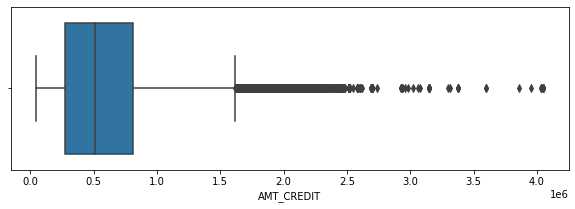

In [112]:
# box plot for AMT_CREDIT
plt.figure(figsize=[10,3])
sns.boxplot(applicants_new['AMT_CREDIT'])
plt.show()

# we can find a lot of outliers in the AMT_CREDIT column

In [113]:
#Checking the different statistical measures of AMT_CREDIT column

round(applicants_new['AMT_CREDIT'].describe())

count     307511.0
mean      599026.0
std       402491.0
min        45000.0
25%       270000.0
50%       513531.0
75%       808650.0
max      4050000.0
Name: AMT_CREDIT, dtype: float64

In [114]:
#Checking the different statistical measures of AMT_INCOME_TOTAL column

round(applicants_new['AMT_INCOME_TOTAL'].describe())

count       307511.0
mean        168798.0
std         237123.0
min          25650.0
25%         112500.0
50%         147150.0
75%         202500.0
max      117000000.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [115]:
#Cleaning the data in AMT_INCOME_TOTAL

applicants_new[applicants_new['AMT_INCOME_TOTAL']>=10000000]

# one applicant with income 117000000 is skewing the over income analysis; for this excercise we would like to modify this number
# to 1170000; assuming this is a data error; also thinking an applicant with 117 million income be defaulter and 
# ask for a loan of 562K

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_YEARS,AGE_BUCKETS,CHILDREN_BUCKETS,FAMILY_BUCKETS,TARGET_DESC
12840,114967,1,Cash loans,F,N,Y,1,117000000,562491,26194,454500,Working,Secondary / secondary special,Married,House / apartment,-12615,1,1,0,0,Laborers,3,Business Entity Type 3,0.113161,0.145543,0,1,34,31-40,<=3 Children,3-5 Members,Defaulter
203693,336147,0,Cash loans,M,Y,Y,2,18000090,675000,69295,675000,Commercial associate,Secondary / secondary special,Married,House / apartment,-15704,1,1,0,0,NaN,4,Business Entity Type 3,0.788606,NaN,0,0,43,41-50,<=3 Children,3-5 Members,Non-defaulter
246858,385674,0,Cash loans,M,Y,Y,0,13500000,1400503,130945,1368000,Commercial associate,Higher education,Married,House / apartment,-13551,1,1,1,0,NaN,2,Business Entity Type 3,0.713507,NaN,0,0,37,31-40,No Child,2 Members,Non-defaulter


In [116]:
# Replacing the values in AMT_INCOME_TOTAL

applicants_new['AMT_INCOME_TOTAL'] = applicants_new['AMT_INCOME_TOTAL'].replace(117000000, 1170000)
applicants_new['AMT_INCOME_TOTAL'] = applicants_new['AMT_INCOME_TOTAL'].replace(18000090, 1800009)
applicants_new['AMT_INCOME_TOTAL'] = applicants_new['AMT_INCOME_TOTAL'].replace(13500000, 1350000)

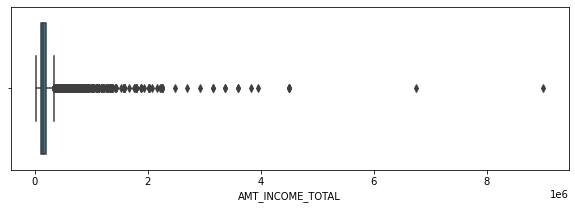

In [117]:
# box plot for AMT_INCOME_TOTAL
plt.figure(figsize=[10,3])
sns.boxplot(applicants_new['AMT_INCOME_TOTAL'])
plt.show()

# We have many outliers in AMT_INCOME_TOTAL

# Check Target column for imbalances

In [118]:
applicants_new.TARGET_DESC.value_counts(normalize=True) * 100

Non-defaulter    91.927118
Defaulter         8.072882
Name: TARGET_DESC, dtype: float64

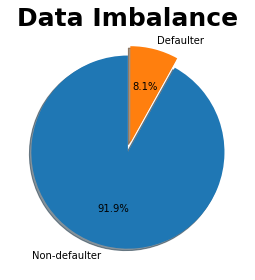

In [119]:
slices = applicants_new.TARGET_DESC.value_counts(normalize=True) * 100
labels = ['Non-defaulter','Defaulter ']
explode = [0, 0.1]

plt.pie(slices, labels=labels, shadow=True, explode=explode,
        startangle=90, autopct='%1.1f%%')

plt.title("Data Imbalance",fontsize=25, fontweight='bold')
plt.tight_layout()
plt.show()

### UNIVARIATE,  BIVARIATE AND MULTIVARIATE ANALYSIS

In [120]:
#Splitting the data set- Replacing defaulter and non defaulter in target column to be done from Mohan file

data_0 = applicants_new[applicants_new['TARGET']==0]
data_1 = applicants_new[applicants_new['TARGET']==1]

#### UNIVARIATE ANALYSIS

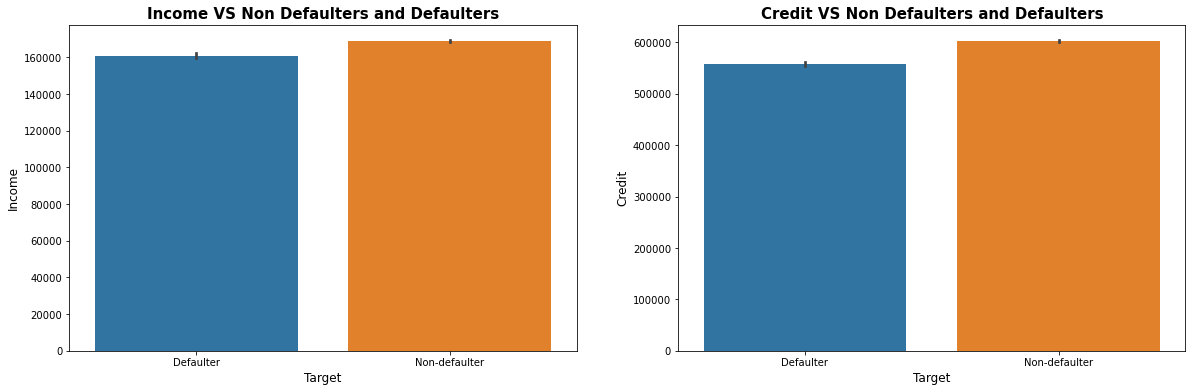

In [121]:

plt.figure(figsize=[20,6]) # setting graph size
plt.subplot(1,2,1)
plt.title("Income VS Non Defaulters and Defaulters",fontsize=15, fontweight='bold')

# bar plot creation between Target and Income
sns.barplot(data=applicants_new,x='TARGET_DESC',y='AMT_INCOME_TOTAL') 
plt.xlabel("Target", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'}) # x axis label
plt.ylabel("Income", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'}) # y axis label

# bar plot creation between Target and credit
plt.subplot(1,2,2)
plt.title("Credit VS Non Defaulters and Defaulters",fontsize=15, fontweight='bold')
sns.barplot(data=applicants_new,x='TARGET_DESC',y='AMT_CREDIT') 
plt.xlabel("Target", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'}) # x axis label
plt.ylabel("Credit", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'}) # y axis label

plt.show() # displaying the graph

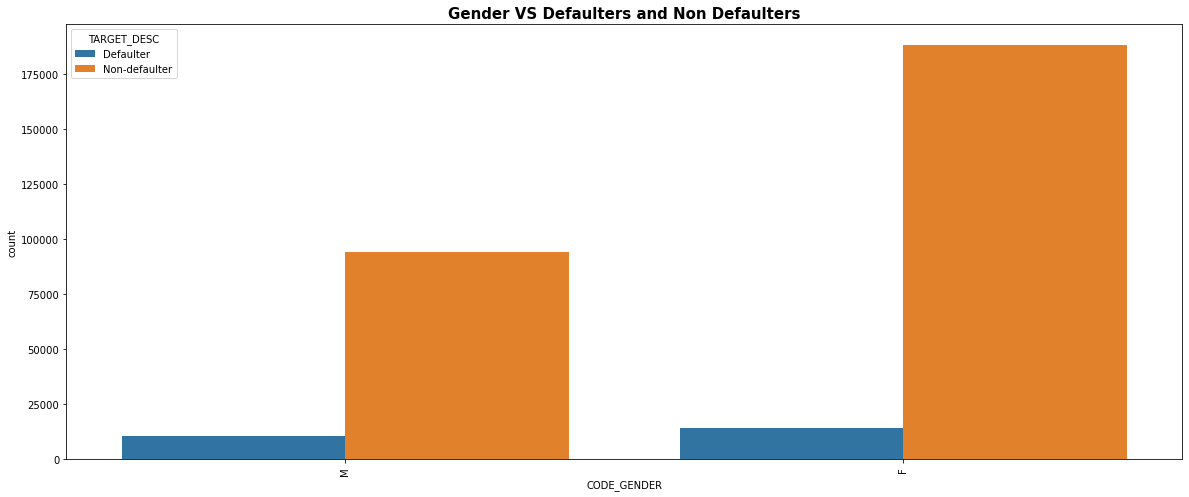

In [122]:
#Graph between gender and Defaulters/Non Defaulters

plt.figure(figsize=[20,8]) 
plt.title("Gender VS Defaulters and Non Defaulters",fontsize=15, fontweight='bold')
sns.countplot(data=applicants_new, x='CODE_GENDER',hue="TARGET_DESC")
plt.xticks(rotation=90)
plt.show()

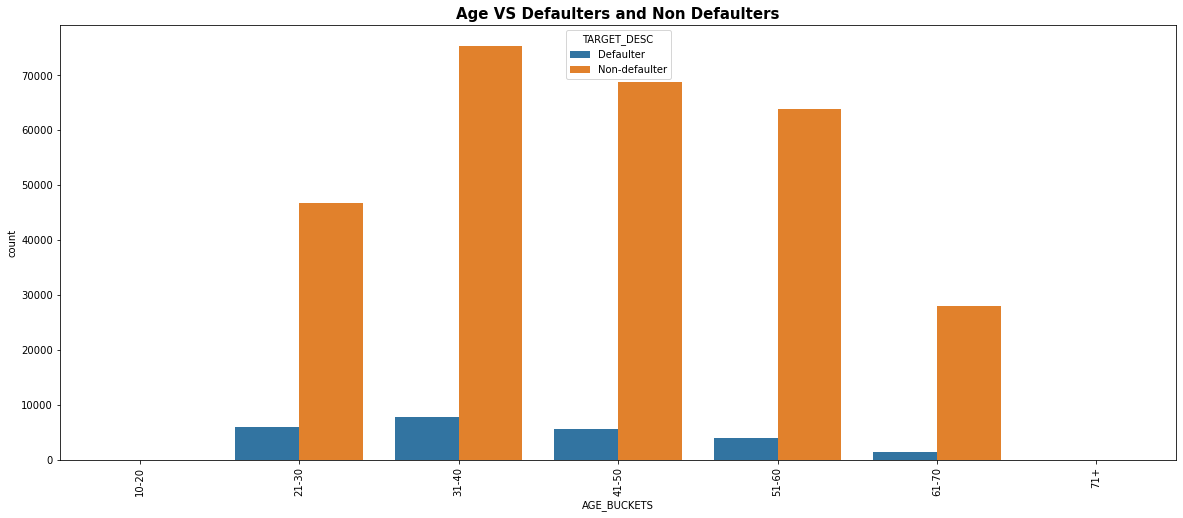

In [123]:
#Graph between Age and Defaulters/Non Defaulters

plt.figure(figsize=[20,8]) # setting graph size
plt.title("Age VS Defaulters and Non Defaulters",fontsize=15, fontweight='bold')
sns.countplot(data=applicants_new, x='AGE_BUCKETS',hue="TARGET_DESC",order=['10-20','21-30', '31-40','41-50','51-60','61-70','71+'])
plt.xticks(rotation=90)
plt.show()

In [124]:
# verify the details of 'unkown' family status
applicants_new['NAME_FAMILY_STATUS'].value_counts()

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [125]:
applicants_new[applicants_new['NAME_FAMILY_STATUS']=='Unknown']
#these two appliants are in the age bucket of 31-40 with no child; based on this limited information, we can change the value from 'Unknown' to 'Single / not married'

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_YEARS,AGE_BUCKETS,CHILDREN_BUCKETS,FAMILY_BUCKETS,TARGET_DESC
41982,148605,0,Revolving loans,M,N,Y,0,450000,675000,33750,0,Commercial associate,Lower secondary,Unknown,Municipal apartment,-12396,1,1,1,0,Managers,2,Insurance,0.700618,NaN,0,0,33,31-40,No Child,2 Members,Non-defaulter
187348,317181,0,Revolving loans,F,N,Y,0,202500,585000,29250,0,Commercial associate,Higher education,Unknown,House / apartment,-12844,1,1,0,0,Accountants,2,Business Entity Type 2,0.645168,0.670652,0,1,35,31-40,No Child,2 Members,Non-defaulter


In [126]:
applicants_new['NAME_FAMILY_STATUS'] = applicants_new['NAME_FAMILY_STATUS'].replace('Unknown', 'Single / not married')

In [127]:
applicants_new.NAME_FAMILY_STATUS.value_counts()*100/applicants_new.shape[0]

Married                 63.878040
Single / not married    14.778658
Civil marriage           9.682580
Separated                6.429038
Widow                    5.231683
Name: NAME_FAMILY_STATUS, dtype: float64

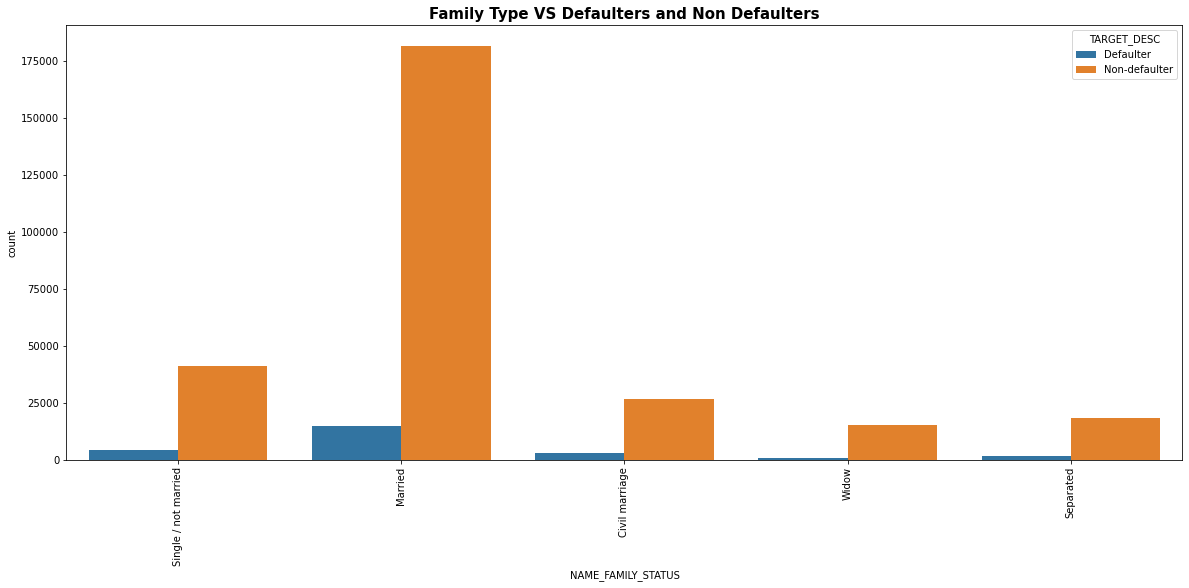

In [128]:
#Graph between Family type and Defaulters/Non Defaulters

plt.figure(figsize=[20,8]) 
plt.title("Family Type VS Defaulters and Non Defaulters",fontsize=15, fontweight='bold')
sns.countplot(data=applicants_new, x='NAME_FAMILY_STATUS',hue="TARGET_DESC")
plt.xticks(rotation=90)
plt.show()

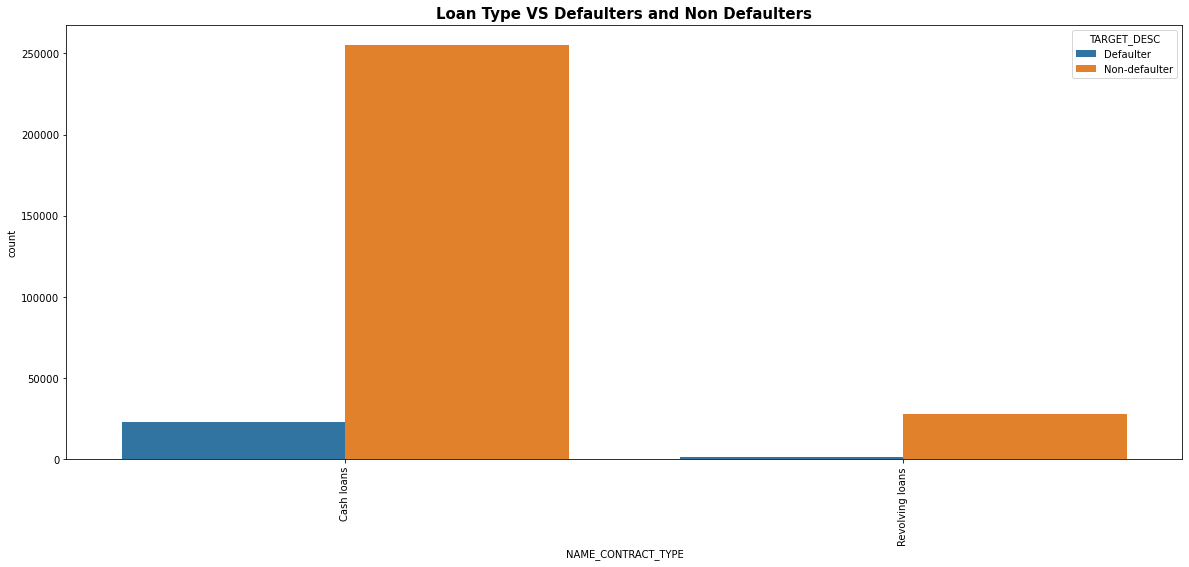

In [129]:
#Graph between Loan Type and Defaulters/Non Defaulters
plt.figure(figsize=[20,8]) 
plt.title("Loan Type VS Defaulters and Non Defaulters",fontsize=15, fontweight='bold')
sns.countplot(data=applicants_new, x='NAME_CONTRACT_TYPE',hue="TARGET_DESC")
plt.xticks(rotation=90)
plt.show()

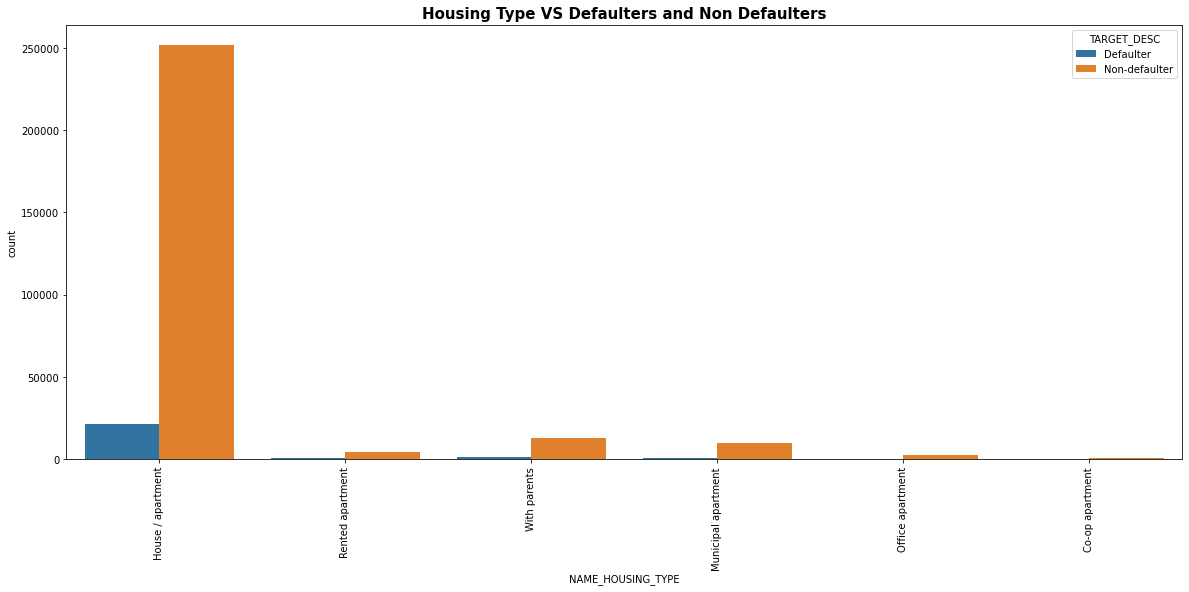

In [130]:
#Graph between Housing Type and Defaulters/Non Defaulters
plt.figure(figsize=[20,8]) 
plt.title("Housing Type VS Defaulters and Non Defaulters",fontsize=15, fontweight='bold')
sns.countplot(data=applicants_new, x='NAME_HOUSING_TYPE',hue="TARGET_DESC")
plt.xticks(rotation=90)
plt.show()

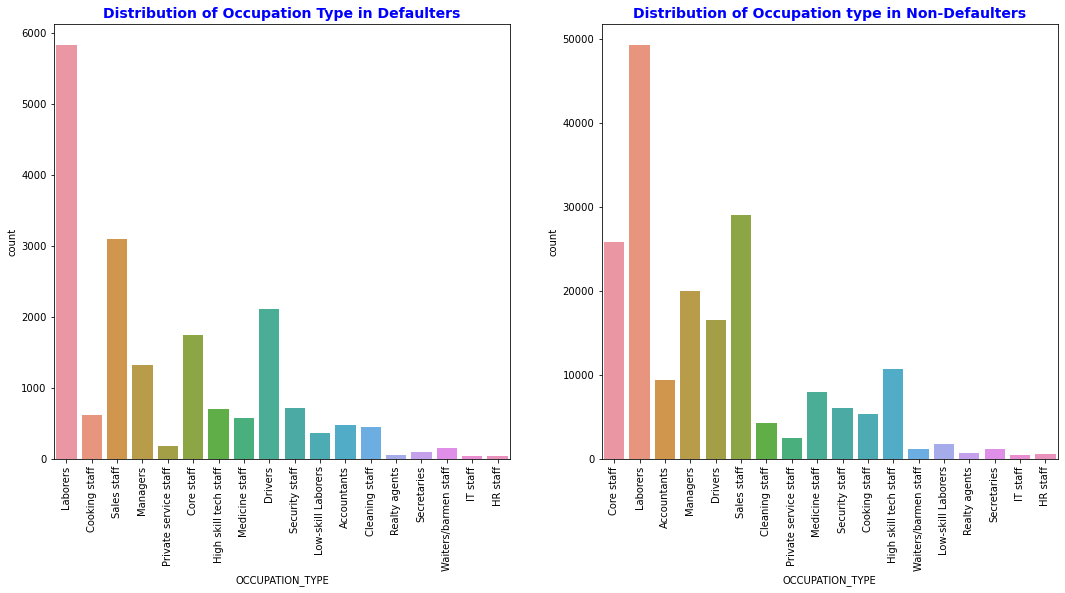

In [131]:
#graph between occupation type and Defaulters/Non Defaulters
plt.figure(figsize=(18,8))

plt.subplot(1,2,1)
sns.countplot(data= data_1, x= data_1['OCCUPATION_TYPE'])
plt.title('Distribution of Occupation Type in Defaulters',fontsize=14, color='blue', fontweight='bold')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(data= data_0, x= data_0['OCCUPATION_TYPE'])
plt.title('Distribution of Occupation type in Non-Defaulters',fontsize=14, color='blue', fontweight='bold')
plt.xticks(rotation=90)

plt.show()
sns.set_style('dark')

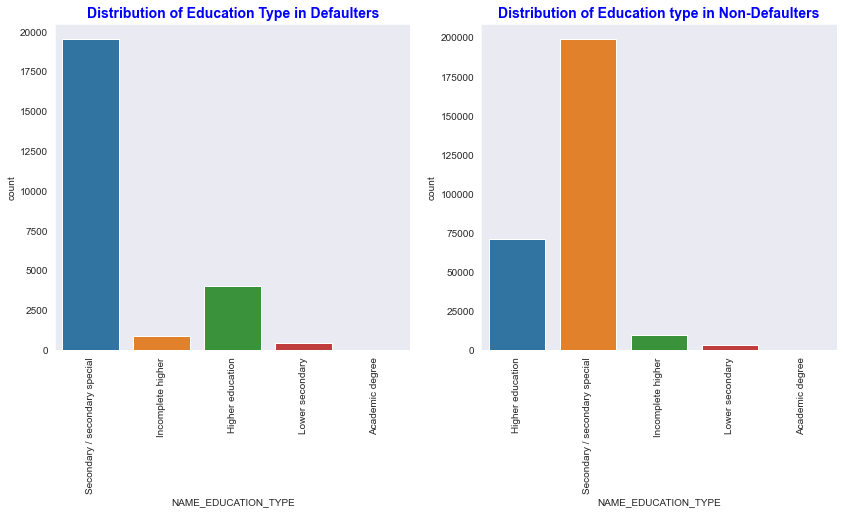

In [132]:
#graph between education type and Defaulters/Non Defaulters
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.countplot(data= data_1, x= data_1['NAME_EDUCATION_TYPE'])
plt.title('Distribution of Education Type in Defaulters',fontsize=14, color='blue', fontweight='bold')
plt.xticks(rotation=90)

plt.subplot(1,2,2)
sns.countplot(data= data_0, x= data_0['NAME_EDUCATION_TYPE'])
plt.title('Distribution of Education type in Non-Defaulters',fontsize=14, color='blue', fontweight='bold')
plt.xticks(rotation=90)

plt.show()
sns.set_style('dark')

### BIVARIATE ANALYSIS

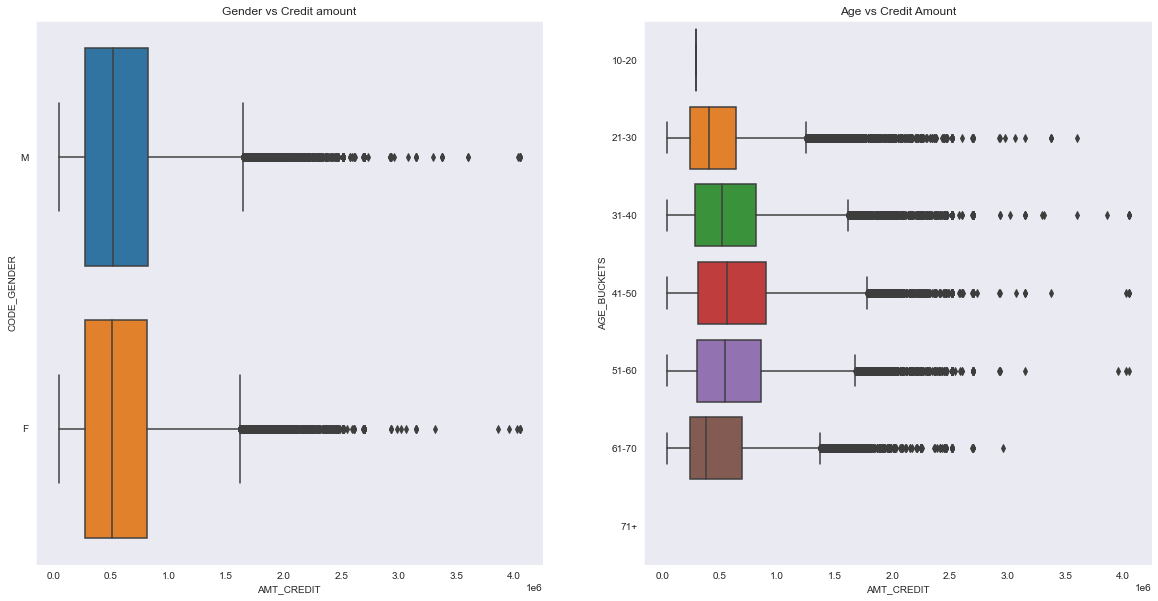

In [133]:
# Graph of Gender VS Credit amount
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
plt.title("Gender vs Credit amount")
sns.boxplot(data = applicants_new, y = "CODE_GENDER", x = 'AMT_CREDIT')

# Graph of Age VS Credit amount
plt.subplot(1,2,2)
plt.title("Age vs Credit Amount")
sns.boxplot(data = applicants_new, y  = "AGE_BUCKETS", x = 'AMT_CREDIT',order=['10-20','21-30', '31-40','41-50','51-60','61-70','71+'])
plt.show()



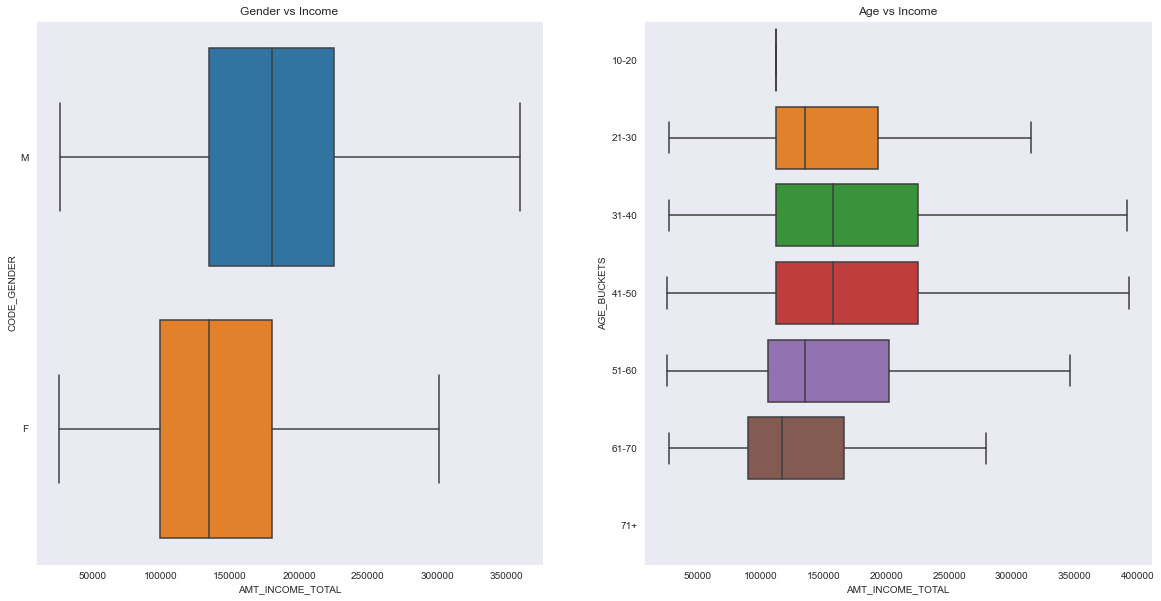

In [134]:
# Graph of Gender Vs Income
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
plt.title("Gender vs Income")
sns.boxplot(data = applicants_new, y = "CODE_GENDER", x = 'AMT_INCOME_TOTAL',showfliers = False)

# Graph of Age Vs Income
plt.subplot(1,2,2)
plt.title("Age vs Income")
sns.boxplot(data = applicants_new, y  = "AGE_BUCKETS", x = 'AMT_INCOME_TOTAL',showfliers = False,order=['10-20','21-30', '31-40','41-50','51-60','61-70','71+'])
plt.show()



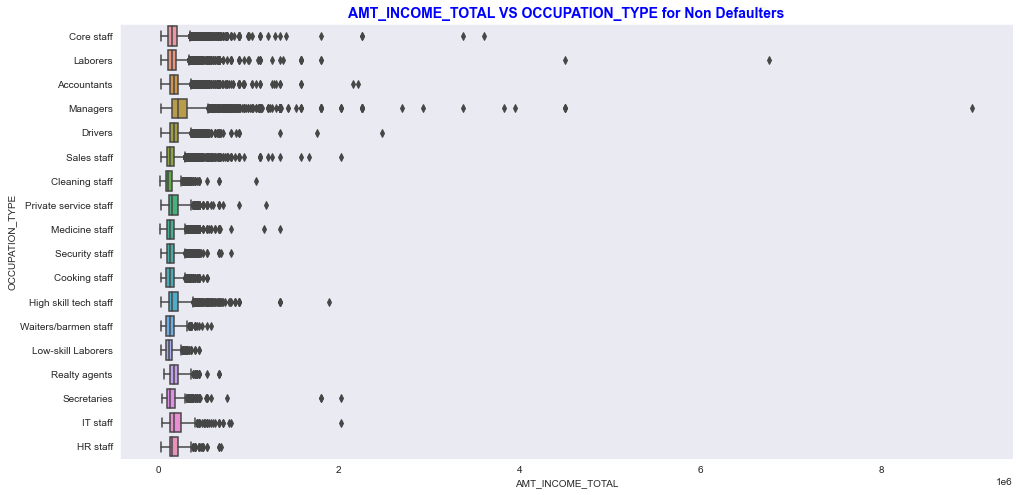

In [135]:
plt.figure(figsize= (16,8))
sns.boxplot(data= data_0, y='OCCUPATION_TYPE', x= 'AMT_INCOME_TOTAL')
plt.title ('AMT_INCOME_TOTAL VS OCCUPATION_TYPE for Non Defaulters', fontsize=14, color='blue', fontweight='bold')
plt.show()

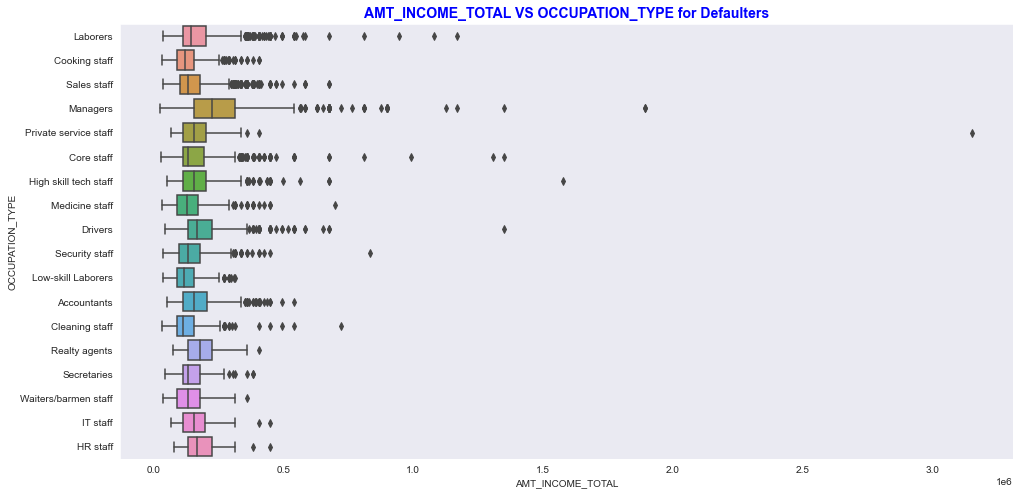

In [136]:
plt.figure(figsize= (16,8))
sns.boxplot(data= data_1, y='OCCUPATION_TYPE', x= 'AMT_INCOME_TOTAL')
plt.title ('AMT_INCOME_TOTAL VS OCCUPATION_TYPE for Defaulters', fontsize=14, color='blue', fontweight='bold')
plt.show()

### MULTIVARIATE ANALYSIS

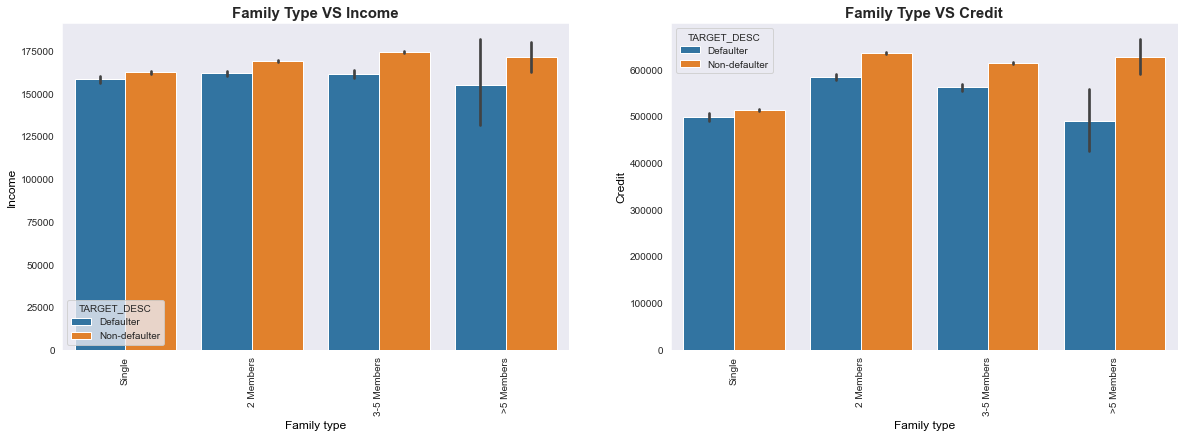

In [137]:
# Bar plot creation between Family type and Income

plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
plt.title("Family Type VS Income",fontsize=15, fontweight='bold')
sns.barplot(data=applicants_new,x='FAMILY_BUCKETS',y='AMT_INCOME_TOTAL',hue="TARGET_DESC") 
plt.xlabel("Family type", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Income", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'}) 
plt.xticks(rotation=90)

# bar plot creation between Family type and credit

plt.subplot(1,2,2)
plt.title("Family Type VS Credit",fontsize=15, fontweight='bold')
sns.barplot(data=applicants_new,x='FAMILY_BUCKETS',y='AMT_CREDIT',hue="TARGET_DESC") 
plt.xlabel("Family type", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'}) 
plt.ylabel("Credit", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'}) 
plt.xticks(rotation=90)
plt.show() 

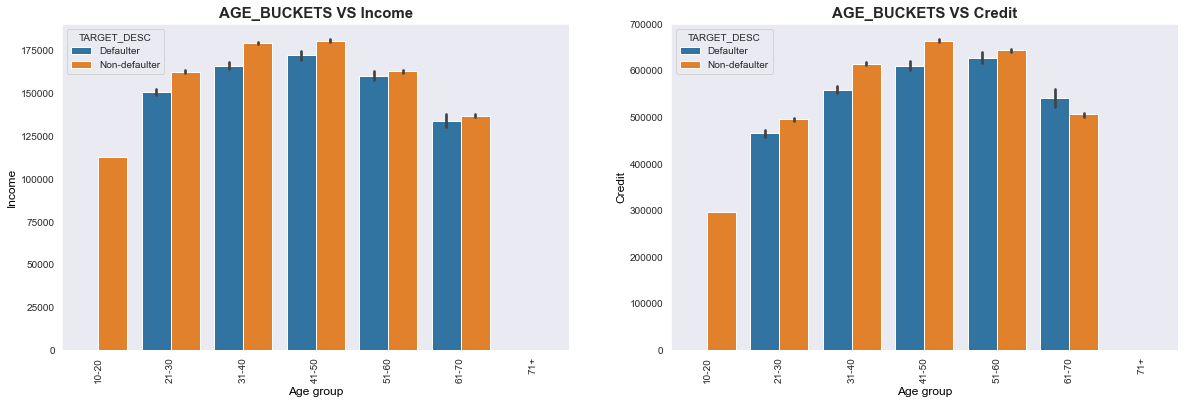

In [138]:
# bar plot creation between AGE_BUCKETS and Income
plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
plt.title("AGE_BUCKETS VS Income",fontsize=15, fontweight='bold')
sns.barplot(data=applicants_new,x='AGE_BUCKETS',y='AMT_INCOME_TOTAL',hue="TARGET_DESC",order=['10-20','21-30', '31-40','41-50','51-60','61-70','71+']) 
plt.xlabel("Age group", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'}) 
plt.ylabel("Income", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'}) 
plt.xticks(rotation=90)

# bar plot creation between AGE_BUCKETS and Credit
plt.subplot(1,2,2)
plt.title("AGE_BUCKETS VS Credit",fontsize=15, fontweight='bold')
sns.barplot(data=applicants_new,x='AGE_BUCKETS',y='AMT_CREDIT',hue="TARGET_DESC",order=['10-20','21-30', '31-40','41-50','51-60','61-70','71+'])
plt.xlabel("Age group", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'}) 
plt.ylabel("Credit", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'}) 
plt.xticks(rotation=90)
plt.show() 

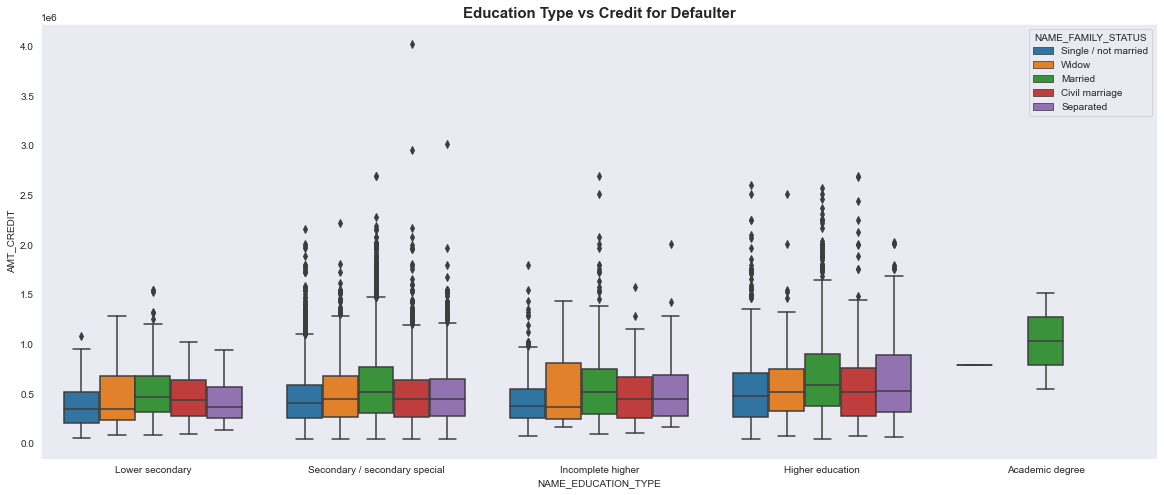

In [139]:
#Graph of education type vs credit for defaulters

plt.figure(figsize=[20,8])
sns.boxplot(data = applicants_new[applicants_new['TARGET']==1], 
            x='NAME_EDUCATION_TYPE',
            y='AMT_CREDIT', 
            hue='NAME_FAMILY_STATUS',
           order=['Lower secondary','Secondary / secondary special','Incomplete higher','Higher education','Academic degree'])
plt.title('Education Type vs Credit for Defaulter',
          fontsize=15, fontweight='bold')
plt.show()

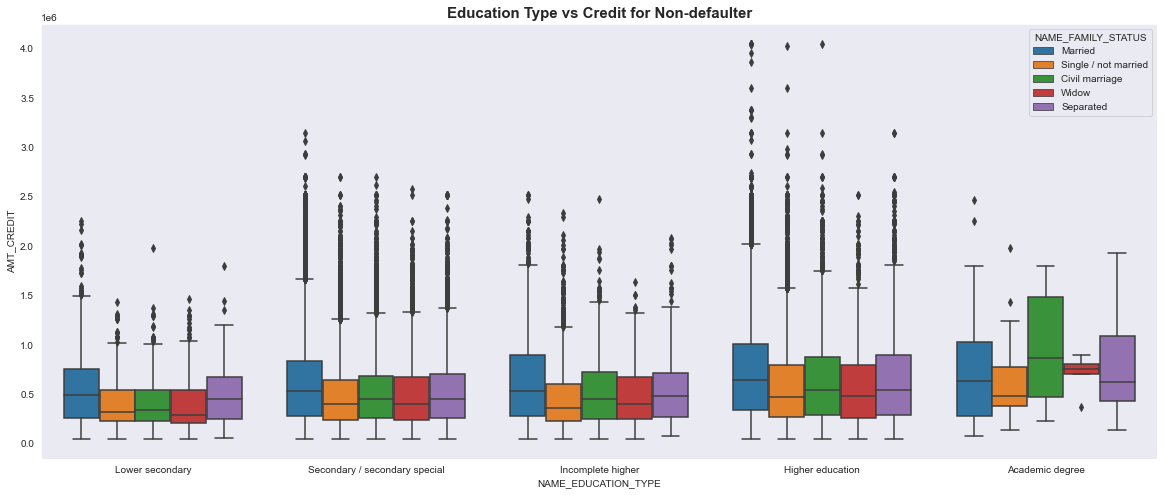

In [140]:
#Graph of education type vs credit for Non defaulters
plt.figure(figsize=[20,8])
sns.boxplot(data = applicants_new[applicants_new['TARGET']==0], 
            x='NAME_EDUCATION_TYPE',
            y='AMT_CREDIT', 
            hue='NAME_FAMILY_STATUS',
           order=['Lower secondary','Secondary / secondary special','Incomplete higher','Higher education','Academic degree']
           )
plt.title('Education Type vs Credit for Non-defaulter',
          fontsize=15, fontweight='bold')
plt.show()

### Analyzing and visualising the Credit VS Income Ratio

In [141]:
applicants_new[applicants_new["AMT_ANNUITY"]>applicants_new["AMT_INCOME_TOTAL"]].TARGET.value_counts()
# all these 33 applicant's application should be rejected as thier loan annuity is greater than total income

0    28
1     5
Name: TARGET, dtype: int64

In [142]:
#Checking the Annuity and income for the applicants

applicants_new[applicants_new["AMT_ANNUITY"]>applicants_new["AMT_INCOME_TOTAL"]]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_YEARS,AGE_BUCKETS,CHILDREN_BUCKETS,FAMILY_BUCKETS,TARGET_DESC
678,100784,1,Cash loans,F,N,Y,0,54000,1885500,74191,1885500,Pensioner,Secondary / secondary special,Married,House / apartment,-22181,1,0,0,0,NaN,2,Other,0.623843,NaN,0,0,60,51-60,No Child,2 Members,Defaulter
20727,124157,1,Cash loans,F,Y,Y,0,25650,2173500,48118,2173500,Pensioner,Secondary / secondary special,Civil marriage,House / apartment,-21517,1,0,0,0,NaN,2,Other,0.175965,NaN,0,0,58,51-60,No Child,2 Members,Defaulter
25802,129999,0,Cash loans,F,N,Y,0,46044,1024740,52452,900000,Pensioner,Secondary / secondary special,Married,House / apartment,-20148,1,0,0,1,NaN,2,Other,0.479272,NaN,0,0,55,51-60,No Child,2 Members,Non-defaulter
35791,141454,0,Cash loans,F,Y,Y,0,45000,2215224,58567,1980000,Pensioner,Secondary / secondary special,Married,House / apartment,-22270,1,0,0,0,NaN,2,Other,0.509060,0.832785,0,2,61,61-70,No Child,2 Members,Non-defaulter
49185,156942,0,Cash loans,F,Y,Y,0,33750,835380,36927,675000,Pensioner,Secondary / secondary special,Married,House / apartment,-18256,1,0,0,0,NaN,2,Other,0.542492,0.689479,0,1,50,41-50,No Child,2 Members,Non-defaulter
58379,167672,0,Cash loans,F,Y,N,0,54000,1724688,60079,1575000,Working,Secondary / secondary special,Married,House / apartment,-9510,1,1,0,0,Laborers,2,Housing,0.570779,0.418854,1,2,26,21-30,No Child,2 Members,Non-defaulter
64338,174612,0,Cash loans,F,N,Y,0,54000,1574532,64260,1350000,Pensioner,Higher education,Married,House / apartment,-20501,1,0,0,0,NaN,2,Other,0.610816,0.680139,0,2,56,51-60,No Child,2 Members,Non-defaulter
68803,179800,0,Cash loans,F,N,Y,0,31500,755190,32125,675000,Working,Secondary / secondary special,Married,House / apartment,-18833,1,1,0,0,NaN,2,Other,0.714328,0.691021,0,0,51,51-60,No Child,2 Members,Non-defaulter
95599,210988,0,Cash loans,M,Y,Y,0,76500,2013840,82152,1800000,Pensioner,Secondary / secondary special,Married,House / apartment,-21531,1,0,0,0,NaN,2,Other,0.751600,0.749022,3,1,58,51-60,No Child,2 Members,Non-defaulter
112431,230424,0,Cash loans,F,N,Y,0,40500,472500,44635,454500,Pensioner,Secondary / secondary special,Married,House / apartment,-23230,1,0,0,0,NaN,2,Other,0.537059,0.770087,0,0,63,61-70,No Child,2 Members,Non-defaulter


In [143]:
# calculate Credit vs Income ratio

applicants_new["Credit vs Income"]=applicants_new["AMT_CREDIT"]/applicants_new["AMT_INCOME_TOTAL"]



In [144]:
applicants_new["Credit vs Income"] = applicants_new["Credit vs Income"].astype(int)

In [145]:
applicants_new["Credit vs Income"].value_counts()

2     66240
1     56799
3     50380
4     35929
5     27827
6     18817
0     14237
7     12426
8      8662
9      5165
10     3789
11     2747
12     1384
13     1086
14      616
15      464
16      279
17      186
18      112
19      108
20       69
22       38
21       35
23       28
25       18
24       15
26        9
27        9
28        8
30        6
29        5
31        5
32        4
33        3
36        1
40        1
49        1
35        1
34        1
84        1
Name: Credit vs Income, dtype: int64

In [146]:
applicants_new['C vs I Buckets']=applicants_new["Credit vs Income"].apply(lambda x: 'Very Good CTI' if x<=10 else 
                                                                         ('Good CTI' if x>10 and x<=20 else 
                                                                            ('Average CTI' if x>20 and x<=35 else 
                                                                            ('Poor CTI' if x>35 and x<=40
                                                                            else 'Very Poor CTI'))))

In [147]:
applicants_new["Credit vs Income"].describe()

count    307511.000000
mean          3.483248
std           2.701935
min           0.000000
25%           2.000000
50%           3.000000
75%           5.000000
max          84.000000
Name: Credit vs Income, dtype: float64

In [148]:
applicants_new["C vs I Buckets"].value_counts()

Very Good CTI    300271
Good CTI           7051
Average CTI         185
Poor CTI              2
Very Poor CTI         2
Name: C vs I Buckets, dtype: int64

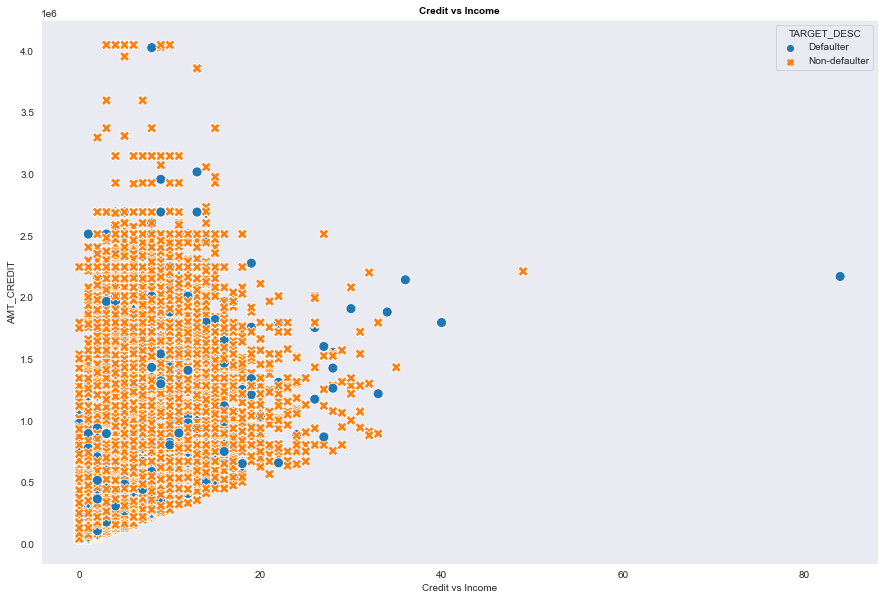

In [149]:
plt.figure(figsize=[15,10])
sns.scatterplot(data = applicants_new,
                y='AMT_CREDIT', 
                x='Credit vs Income', 
                hue="TARGET_DESC",
                style="TARGET_DESC",
                s=100)
plt.title('Credit vs Income',
         fontdict={'size':10, 'color':'black', 'fontweight':'bold'})

plt.show()

In [150]:
applicants_new[applicants_new['Credit vs Income']>20]['C vs I Buckets'].value_counts()

Average CTI      185
Poor CTI           2
Very Poor CTI      2
Name: C vs I Buckets, dtype: int64

In [151]:
applicants_new['C vs I Buckets'].value_counts()

Very Good CTI    300271
Good CTI           7051
Average CTI         185
Poor CTI              2
Very Poor CTI         2
Name: C vs I Buckets, dtype: int64

In [152]:
# applicants_new.groupby('C vs I Buckets')['NAME_FAMILY_STATUS'].value_counts()

# NAME_FAMILY_STATUS
# applicants_new.groupby('AGE_BUCKETS')['CODE_GENDER'].value_counts()

Adhoc=applicants_new[applicants_new['TARGET']==1]

Adhoc.groupby('C vs I Buckets')['NAME_FAMILY_STATUS'].value_counts()


C vs I Buckets  NAME_FAMILY_STATUS  
Average CTI     Married                    16
                Separated                   1
                Widow                       1
Good CTI        Married                   394
                Civil marriage             26
                Single / not married       25
                Widow                      21
                Separated                  14
Poor CTI        Married                     2
Very Good CTI   Married                 14438
                Single / not married     4432
                Civil marriage           2934
                Separated                1605
                Widow                     915
Very Poor CTI   Civil marriage              1
Name: NAME_FAMILY_STATUS, dtype: int64

In [153]:
applicants_new.groupby('C vs I Buckets')['TARGET_DESC'].value_counts()

C vs I Buckets  TARGET_DESC  
Average CTI     Non-defaulter       167
                Defaulter            18
Good CTI        Non-defaulter      6571
                Defaulter           480
Poor CTI        Defaulter             2
Very Good CTI   Non-defaulter    275947
                Defaulter         24324
Very Poor CTI   Defaulter             1
                Non-defaulter         1
Name: TARGET_DESC, dtype: int64

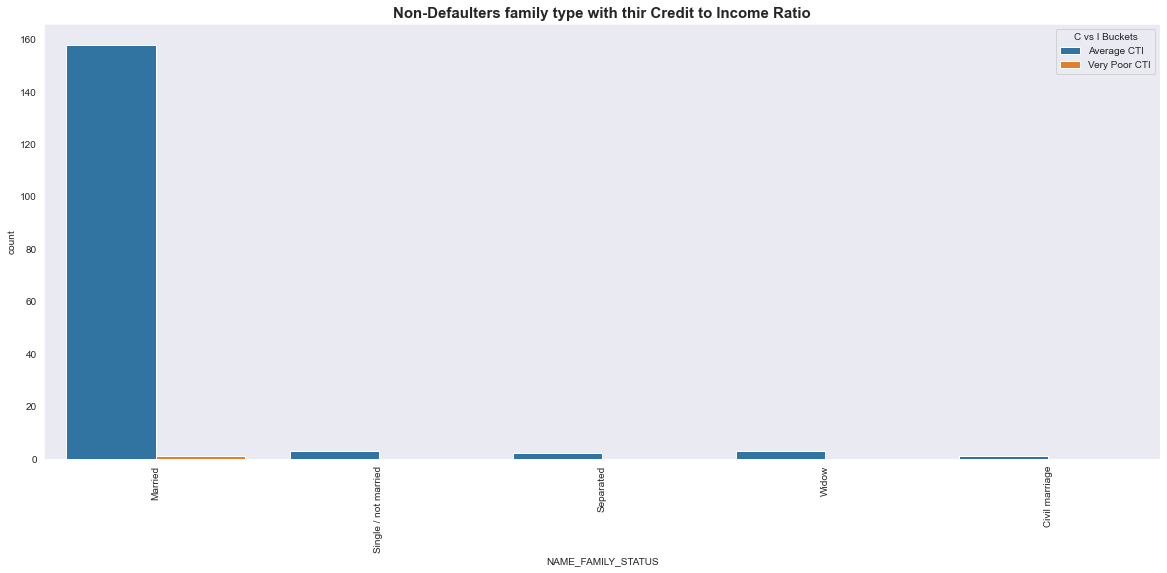

In [154]:
plt.figure(figsize=[20,8]) 
plt.title("Non-Defaulters family type with thir Credit to Income Ratio",fontsize=15, fontweight='bold')
sns.countplot(data=applicants_new[(applicants_new['C vs I Buckets'].isin (['Poor CTI','Very Poor CTI','Average CTI'])) & (applicants_new['TARGET']==0)], 
              x='NAME_FAMILY_STATUS',hue='C vs I Buckets')
plt.xticks(rotation=90)
plt.show()

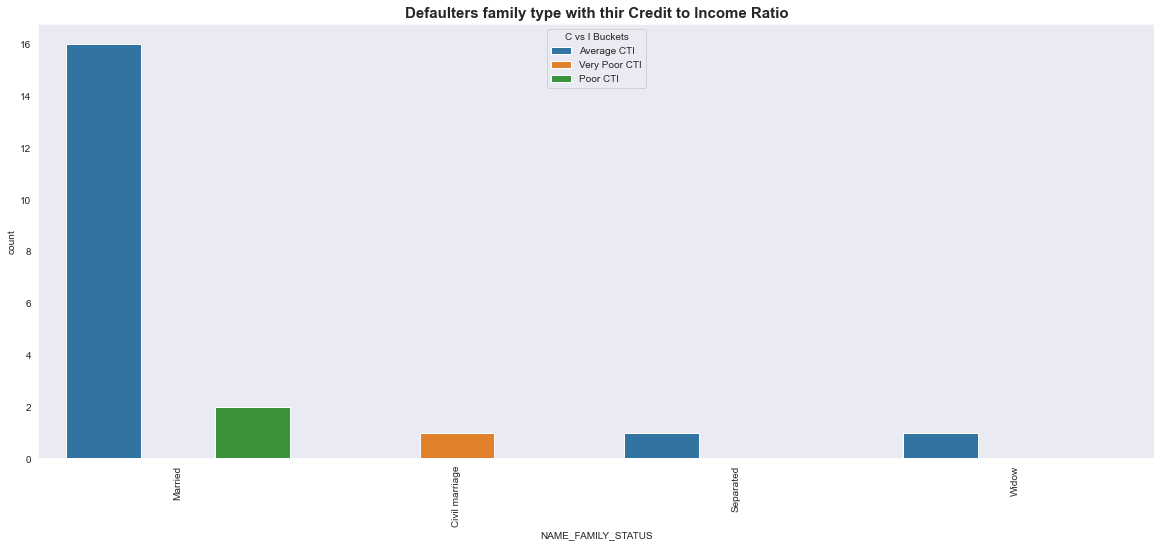

In [155]:
plt.figure(figsize=[20,8]) 
plt.title("Defaulters family type with thir Credit to Income Ratio",fontsize=15, fontweight='bold')
sns.countplot(data=applicants_new[(applicants_new['C vs I Buckets'].isin (['Poor CTI','Very Poor CTI','Average CTI'])) & (applicants_new['TARGET']==1)], 
              x='NAME_FAMILY_STATUS',hue='C vs I Buckets')
plt.xticks(rotation=90)
plt.show()

Inference: above the different appicants  with  average to very poor CTI ratio that we can straight away reject the loans 

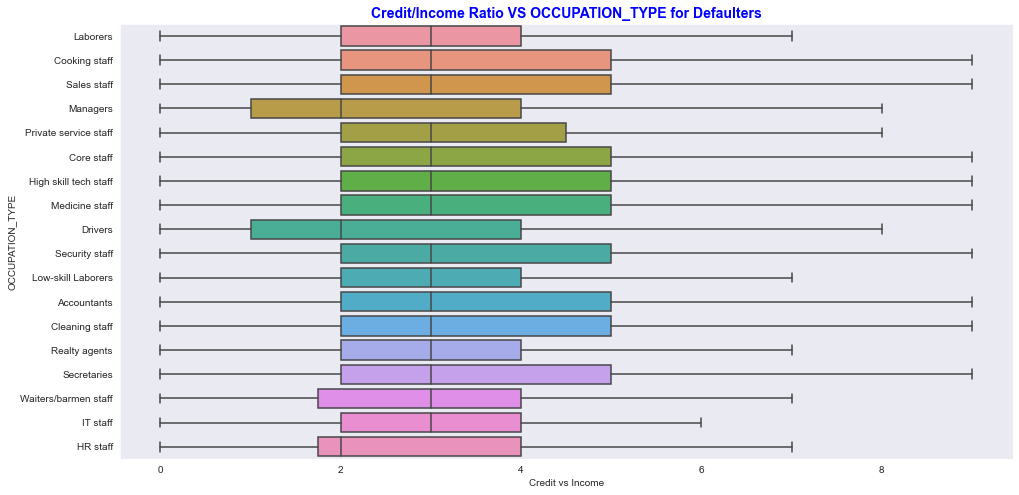

In [156]:
#Credit/Income Ratio VS OCCUPATION_TYPE for Defaulters
plt.figure(figsize= (16,8))
sns.boxplot(data= applicants_new[applicants_new['TARGET']==1], y='OCCUPATION_TYPE', x= 'Credit vs Income',showfliers = False)
plt.title ('Credit/Income Ratio VS OCCUPATION_TYPE for Defaulters', fontsize=14, color='blue', fontweight='bold')
plt.show()

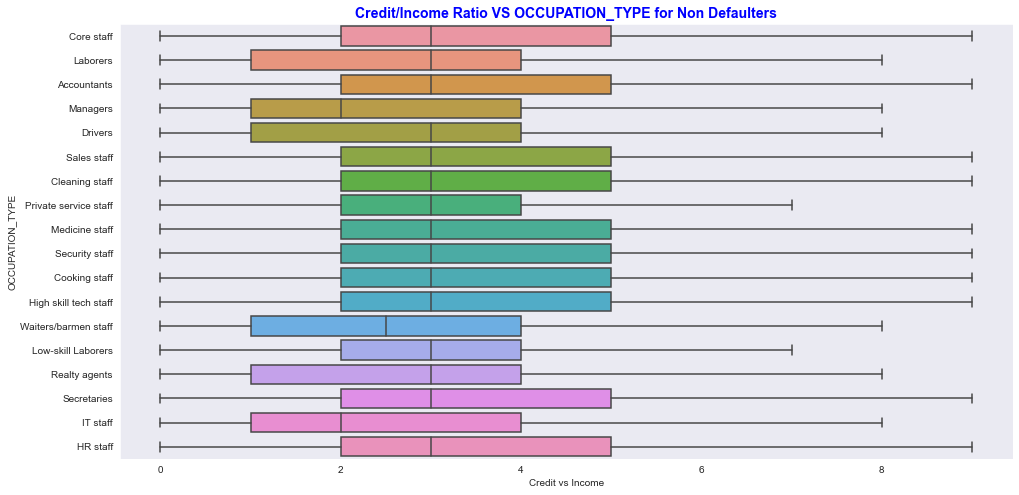

In [157]:
#Credit/Income Ratio VS OCCUPATION_TYPE for Non Defaulters
plt.figure(figsize= (16,8))
sns.boxplot(data= applicants_new[applicants_new['TARGET']==0], y='OCCUPATION_TYPE', x= 'Credit vs Income',showfliers = False)
plt.title ('Credit/Income Ratio VS OCCUPATION_TYPE for Non Defaulters', fontsize=14, color='blue', fontweight='bold')
plt.show()

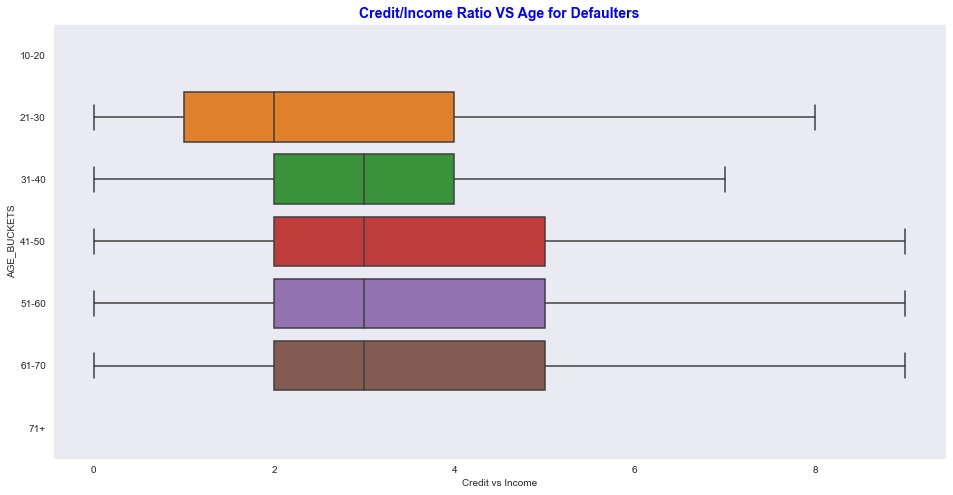

In [158]:
#Credit/Income Ratio VS Age for Defaulters
plt.figure(figsize= (16,8))
sns.boxplot(data= applicants_new[applicants_new['TARGET']==1], y='AGE_BUCKETS', x= 'Credit vs Income',showfliers = False,order=['10-20','21-30', '31-40','41-50','51-60','61-70','71+'])
plt.title ('Credit/Income Ratio VS Age for Defaulters', fontsize=14, color='blue', fontweight='bold')
plt.show()

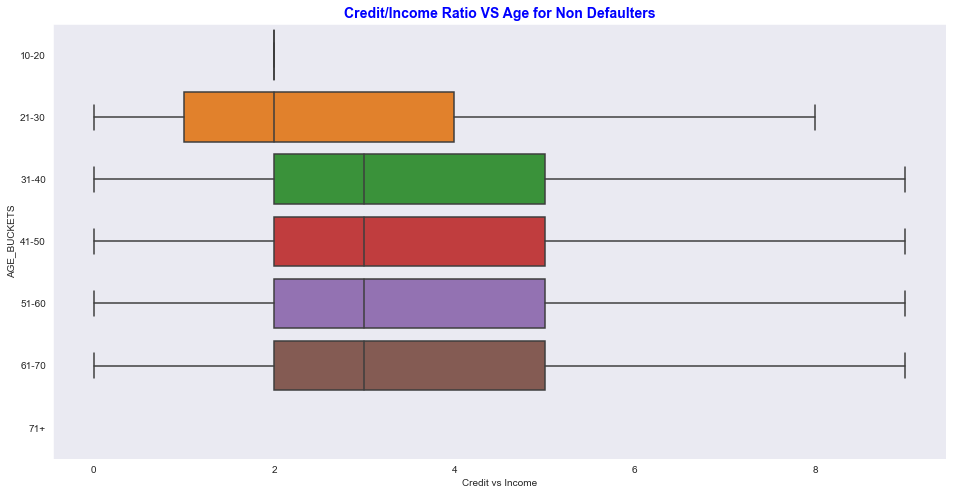

In [159]:
#Credit/Income Ratio VS Age for Non Defaulters
plt.figure(figsize= (16,8))
sns.boxplot(data= applicants_new[applicants_new['TARGET']==0], y='AGE_BUCKETS', x= 'Credit vs Income',showfliers = False,order=['10-20','21-30', '31-40','41-50','51-60','61-70','71+'])
plt.title ('Credit/Income Ratio VS Age for Non Defaulters', fontsize=14, color='blue', fontweight='bold')
plt.show()

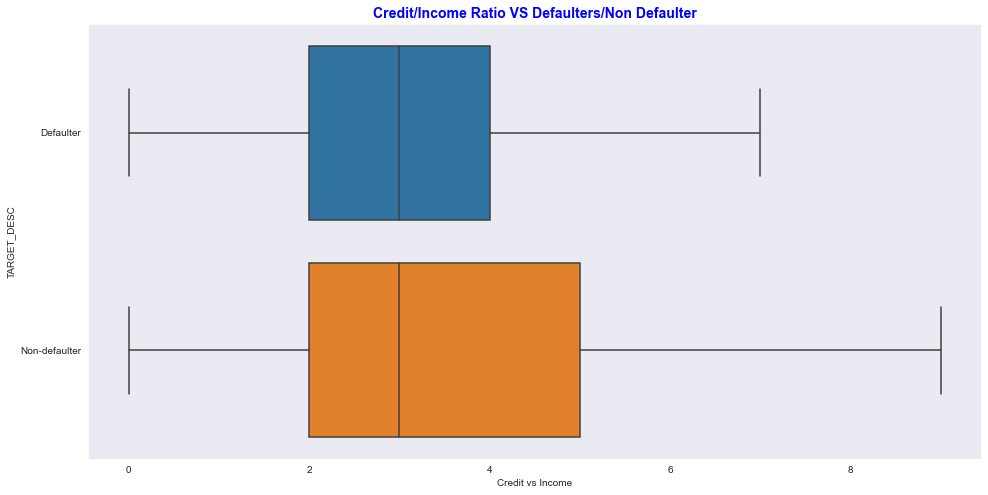

In [160]:
#Credit/Income Ratio VS Defaulters/Non Defaulter
plt.figure(figsize= (16,8))
sns.boxplot(data= applicants_new, y='TARGET_DESC', x= 'Credit vs Income',showfliers = False)
plt.title ('Credit/Income Ratio VS Defaulters/Non Defaulter', fontsize=14, color='blue', fontweight='bold')
plt.show()

### Finding Correlation for numerical columns for Non Defaulters

In [161]:
corr_0 = data_0[['AGE_YEARS','AMT_INCOME_TOTAL','CNT_CHILDREN','CNT_FAM_MEMBERS','AMT_ANNUITY','AMT_CREDIT']].corr()

#Reading the correlation table

corr_0

,AGE_YEARS,AMT_INCOME_TOTAL,CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_ANNUITY,AMT_CREDIT
AGE_YEARS,1.000000,-0.067217,-0.336907,-0.285804,-0.012225,0.047366
AMT_INCOME_TOTAL,-0.067217,1.000000,0.028591,0.035917,0.447789,0.369262
CNT_CHILDREN,-0.336907,0.028591,1.000000,0.878571,0.020949,0.003081
CNT_FAM_MEMBERS,-0.285804,0.035917,0.878571,1.000000,0.075815,0.064536
AMT_ANNUITY,-0.012225,0.447789,0.020949,0.075815,1.000000,0.771247
AMT_CREDIT,0.047366,0.369262,0.003081,0.064536,0.771247,1.000000


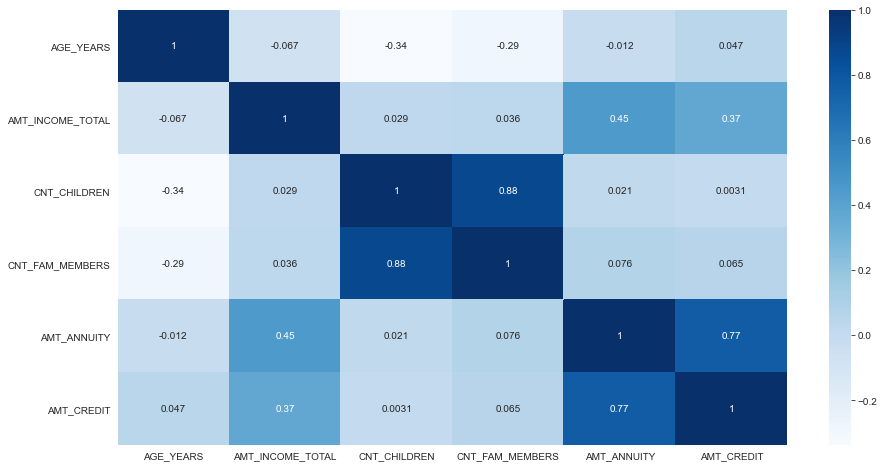

In [162]:
# heatmap of correlation for numerical columns of Non Defaulters

plt.figure(figsize=(15,8))
sns.heatmap(corr_0, annot= True, cmap="Blues")
plt.show()

### Finding Correlation for numerical columns of Defaulters

In [163]:
corr_1= data_1[['AGE_YEARS','AMT_INCOME_TOTAL','CNT_CHILDREN','CNT_FAM_MEMBERS','AMT_ANNUITY','AMT_CREDIT']].corr()

#Reading the correlation table

corr_1

,AGE_YEARS,AMT_INCOME_TOTAL,CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_ANNUITY,AMT_CREDIT
AGE_YEARS,1.000000,0.002248,-0.259222,-0.203403,0.014028,0.135070
AMT_INCOME_TOTAL,0.002248,1.000000,0.003147,0.010880,0.397182,0.324520
CNT_CHILDREN,-0.259222,0.003147,1.000000,0.885484,0.031257,-0.001675
CNT_FAM_MEMBERS,-0.203403,0.010880,0.885484,1.000000,0.075712,0.051224
AMT_ANNUITY,0.014028,0.397182,0.031257,0.075712,1.000000,0.752195
AMT_CREDIT,0.135070,0.324520,-0.001675,0.051224,0.752195,1.000000


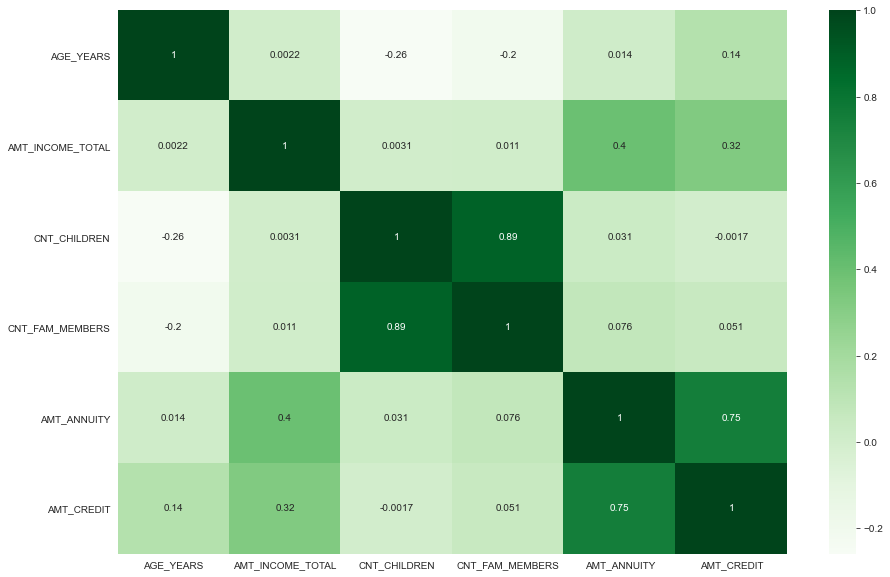

In [164]:
# heatmap of correlation for numerical columns of Defaulters

plt.figure(figsize=(15,10))
sns.heatmap(corr_1, annot= True, cmap="Greens")
plt.show()

#### Overall, we can conclude that we have same correlation behavior for the numerical variables which we have chosen across both defaulters and non defaulters.

# Merge Prev_Applications dataset with Applicants dataset

In [165]:
applicants_new.shape

(307511, 34)

In [166]:
prior_applications_new.shape

(1670214, 26)

In [167]:
# drop rows which do not have loan purpose listed with valid values; 
# drop application NAME_CASH_LOAN_PURPOSE value as XNA or XAP
prior_applications_new.drop(prior_applications_new[prior_applications_new['NAME_CASH_LOAN_PURPOSE'].isin(['XNA', 'XAP'])].index, inplace=True)

In [168]:
prior_applications_new.shape

(69635, 26)

In [169]:
# tried both left and inner joins; looks like there are multiple applications for each applicant ID in the
# prior application dataset;
Final_dataset = pd.merge(applicants_new, prior_applications_new, how='inner',
                         on=['SK_ID_CURR'])
Final_dataset.shape

(59413, 59)

In [170]:
Final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59413 entries, 0 to 59412
Data columns (total 59 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   59413 non-null  int64  
 1   TARGET                       59413 non-null  int64  
 2   NAME_CONTRACT_TYPE_x         59413 non-null  object 
 3   CODE_GENDER                  59413 non-null  object 
 4   FLAG_OWN_CAR                 59413 non-null  object 
 5   FLAG_OWN_REALTY              59413 non-null  object 
 6   CNT_CHILDREN                 59413 non-null  int64  
 7   AMT_INCOME_TOTAL             59413 non-null  int32  
 8   AMT_CREDIT_x                 59413 non-null  int32  
 9   AMT_ANNUITY_x                59413 non-null  int32  
 10  AMT_GOODS_PRICE_x            59413 non-null  int32  
 11  NAME_INCOME_TYPE             59413 non-null  object 
 12  NAME_EDUCATION_TYPE          59413 non-null  object 
 13  NAME_FAMILY_STAT

In [171]:
Final_dataset.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,DAYS_BIRTH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,EXT_SOURCE_2,EXT_SOURCE_3,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_YEAR,AGE_YEARS,Credit vs Income,SK_ID_PREV,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT
count,59413.000000,59413.000000,59413.000000,5.941300e+04,5.941300e+04,59413.000000,5.941300e+04,59413.000000,59413.0,59413.000000,59413.000000,59413.000000,59413.000000,59346.000000,49649.000000,59413.000000,59413.000000,59413.000000,59413.000000,5.941300e+04,59179.000000,5.941300e+04,5.941300e+04,5.941300e+04,59413.000000,59413.000000,59413.000000,59413.000000,59179.000000
mean,278525.178968,0.130258,0.411290,1.821284e+05,5.598320e+05,26865.272348,5.009684e+05,-15954.213388,1.0,0.865467,0.224362,0.096208,2.163584,0.499952,0.431312,0.314106,3.086059,43.208675,2.928198,1.935293e+06,25684.687286,4.519988e+05,5.079813e+05,4.519988e+05,12.175147,0.999108,-631.822833,9.513675,29.555552
std,103156.294018,0.336590,0.724574,9.810533e+04,3.669192e+05,13615.058856,3.385366e+05,4109.438473,0.0,0.341227,0.417165,0.294879,0.902982,0.196403,0.199099,1.136483,2.431105,11.260179,2.366121,5.301690e+05,17400.744545,4.943563e+05,5.396833e+05,4.943563e+05,3.216941,0.029854,526.999047,131.046191,17.660545
min,100034.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,0.000000,0.000000e+00,-25184.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000006,0.000527,0.000000,0.000000,21.000000,0.000000,1.000125e+06,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,-2406.000000,-1.000000,5.000000
25%,188958.000000,0.000000,0.000000,1.125000e+05,2.700000e+05,16911.000000,2.295000e+05,-19388.000000,1.0,1.000000,0.000000,0.000000,2.000000,0.370676,0.275000,0.000000,1.000000,34.000000,1.000000,1.479931e+06,13608.045000,1.350000e+05,1.528200e+05,1.350000e+05,10.000000,1.000000,-686.000000,-1.000000,12.000000
50%,279660.000000,0.000000,0.000000,1.575000e+05,4.856400e+05,24948.000000,4.500000e+05,-15681.000000,1.0,1.000000,0.000000,0.000000,2.000000,0.552584,0.432962,0.000000,3.000000,42.000000,2.000000,1.941703e+06,21389.895000,2.475000e+05,3.049245e+05,2.475000e+05,12.000000,1.000000,-490.000000,-1.000000,24.000000
75%,368445.000000,0.000000,1.000000,2.250000e+05,7.551900e+05,34168.000000,6.750000e+05,-12422.000000,1.0,1.000000,0.000000,0.000000,3.000000,0.654255,0.588488,0.000000,5.000000,53.000000,4.000000,2.390904e+06,32681.250000,5.850000e+05,6.750000e+05,5.850000e+05,15.000000,1.000000,-305.000000,0.000000,48.000000
max,456255.000000,1.000000,10.000000,2.214117e+06,3.150000e+06,215500.000000,3.150000e+06,-7722.000000,1.0,1.000000,1.000000,1.000000,12.000000,0.855000,0.874844,24.000000,23.000000,68.000000,84.000000,2.845265e+06,418058.145000,4.050000e+06,4.104351e+06,4.050000e+06,23.000000,1.000000,-2.000000,12102.000000,60.000000


In [172]:
round(Final_dataset['NAME_CONTRACT_STATUS'].value_counts()/len(Final_dataset)* 100,3)

# to simplify the analsis process we have changed contract status values of Cancelled or Unused offer to Refused

Refused         58.549
Approved        38.838
Canceled         2.304
Unused offer     0.308
Name: NAME_CONTRACT_STATUS, dtype: float64

In [173]:
Final_dataset['NAME_CONTRACT_STATUS']=Final_dataset['NAME_CONTRACT_STATUS'].replace('Canceled', 'Refused')
Final_dataset['NAME_CONTRACT_STATUS']=Final_dataset['NAME_CONTRACT_STATUS'].replace('Unused offer', 'Refused')

In [174]:
round(Final_dataset['NAME_CONTRACT_STATUS'].value_counts()/len(Final_dataset)* 100,3)

Refused     61.162
Approved    38.838
Name: NAME_CONTRACT_STATUS, dtype: float64

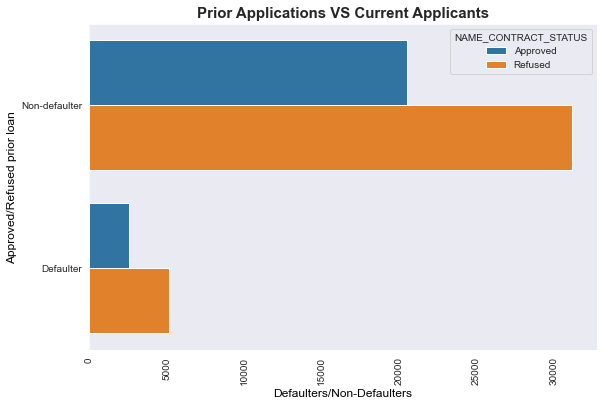

In [175]:
plt.figure(figsize=[20,6])
plt.subplot(1,2,1)
plt.title("Prior Applications VS Current Applicants",fontsize=15, fontweight='bold')
sns.countplot(data=Final_dataset,y='TARGET_DESC',hue="NAME_CONTRACT_STATUS") 
plt.xlabel("Defaulters/Non-Defaulters", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'})
plt.ylabel("Approved/Refused prior loan", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Black'}) 
plt.xticks(rotation=90)
plt.show()



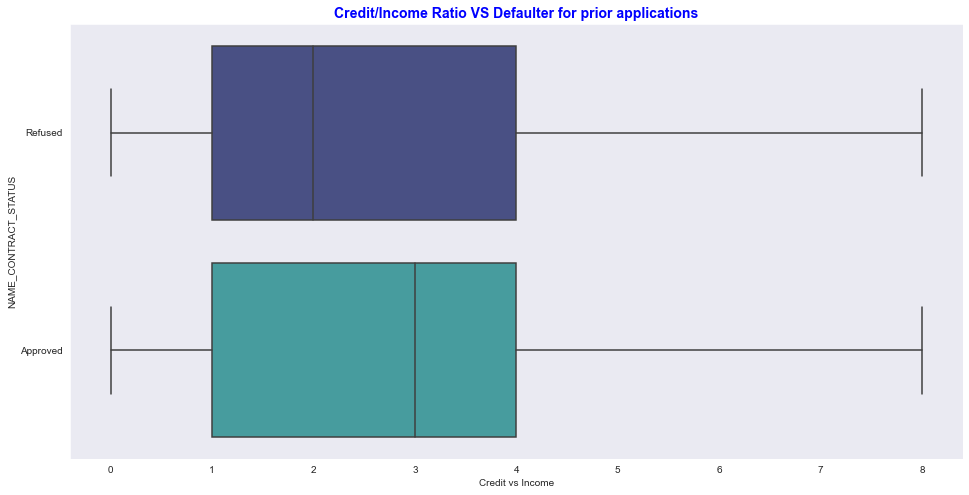

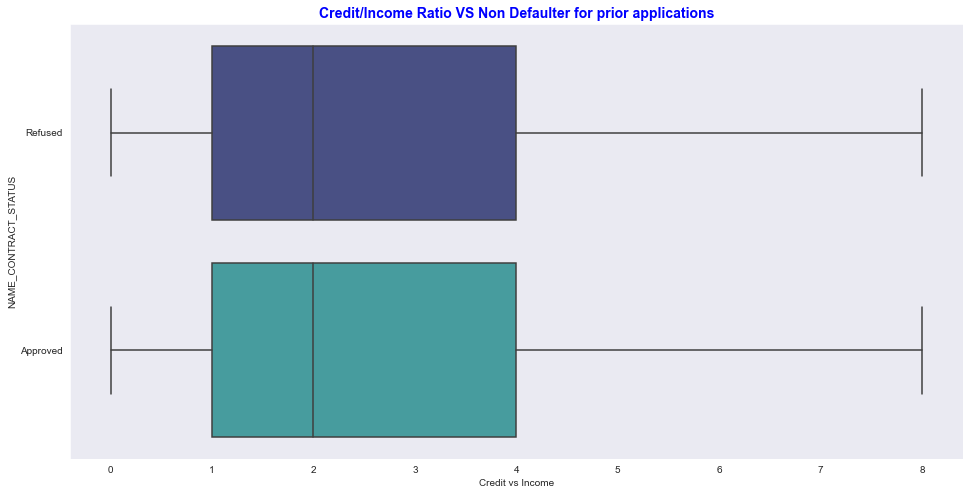

In [176]:
#Credit/Income Ratio VS Defaulter for prior applications

plt.figure(figsize= (16,8))
sns.boxplot(data= Final_dataset[Final_dataset["TARGET"]==1], y='NAME_CONTRACT_STATUS', x= 'Credit vs Income',showfliers = False,
           order=['Refused','Approved'],
           palette="mako")
plt.title ('Credit/Income Ratio VS Defaulter for prior applications', fontsize=14, color='blue', fontweight='bold')
plt.figure(figsize= (16,8))
sns.boxplot(data= Final_dataset[Final_dataset["TARGET"]==0], y='NAME_CONTRACT_STATUS', x= 'Credit vs Income',showfliers = False,
           order=['Refused','Approved'],
           palette="mako")
plt.title ('Credit/Income Ratio VS Non Defaulter for prior applications', fontsize=14, color='blue', fontweight='bold')
plt.show()

### INFERENCES FOR Prior applications vs current applicants:

1- Ignoring outliers, the defualter whose loans were approved have higer credit to income ratio
2- Ignoring outliers, the refused applications have moderate credit to income ratio; we would suggest to take a look at the Refused vs approved with other category information


In [177]:
Final_dataset['NAME_EDUCATION_TYPE'].value_counts()

Secondary / secondary special    43618
Higher education                 13183
Incomplete higher                 1924
Lower secondary                    666
Academic degree                     22
Name: NAME_EDUCATION_TYPE, dtype: int64

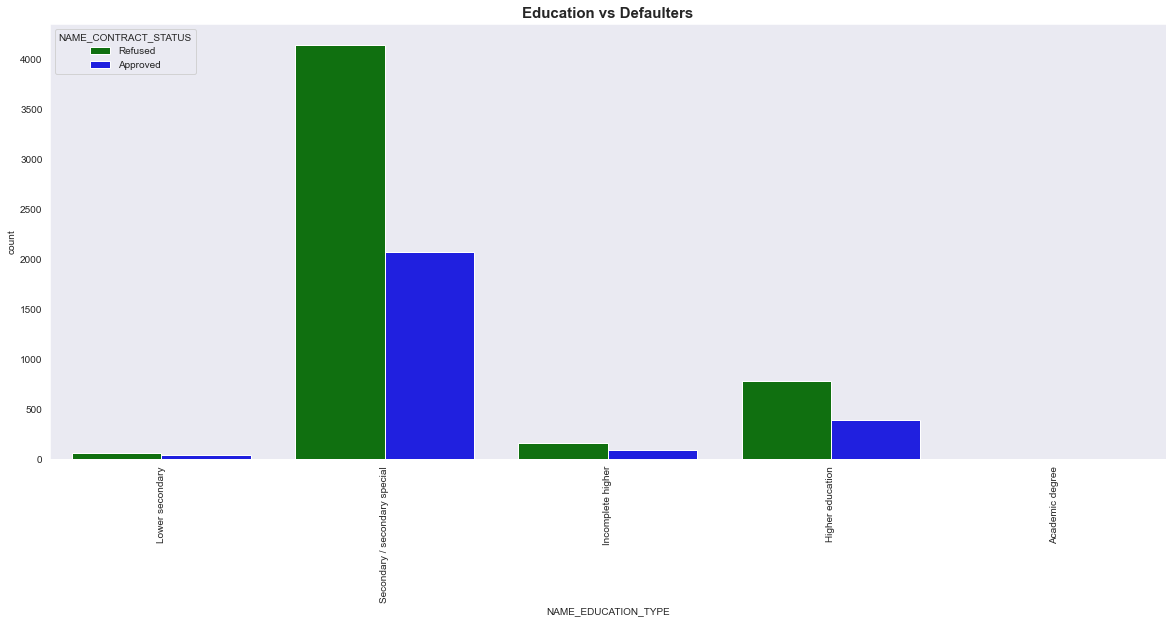

In [178]:
#Graph between Education and Defaulters
plt.figure(figsize=[20,8]) 
plt.title("Education vs Defaulters",fontsize=15, fontweight='bold')
sns.countplot(data=Final_dataset[Final_dataset["TARGET"]==1], x='NAME_EDUCATION_TYPE',hue='NAME_CONTRACT_STATUS',
              palette=["g", "b", "r"],order=['Lower secondary','Secondary / secondary special','Incomplete higher','Higher education','Academic degree'])
plt.xticks(rotation=90)
plt.show()

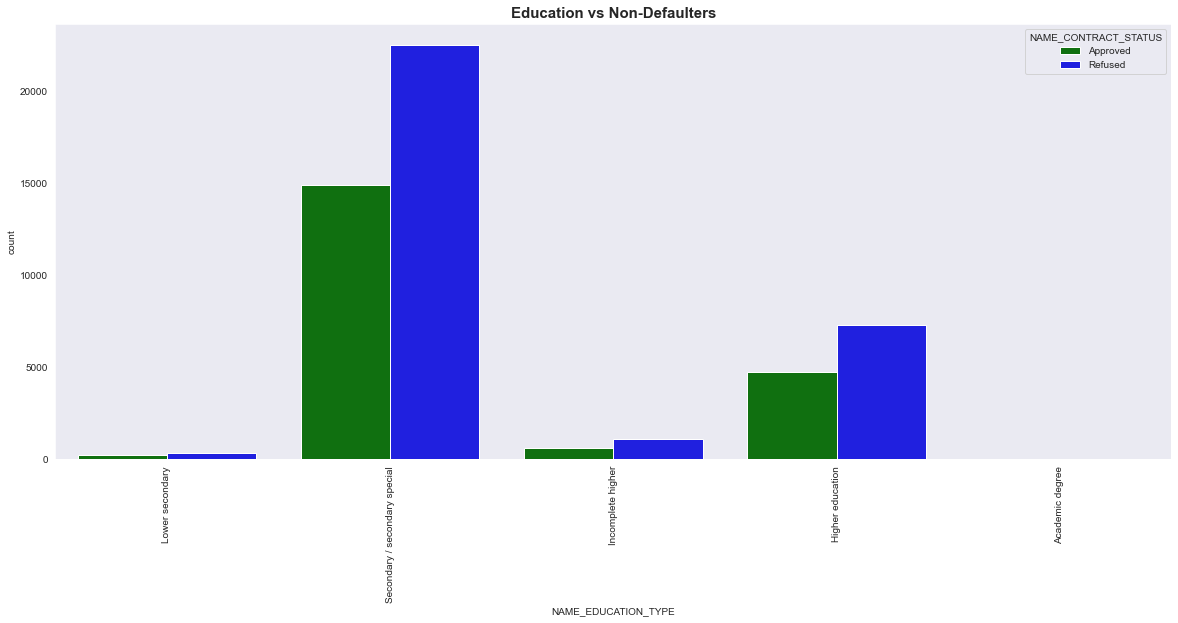

In [179]:
#Graph between Education and Defaulters
plt.figure(figsize=[20,8]) 
plt.title("Education vs Non-Defaulters",fontsize=15, fontweight='bold')
sns.countplot(data=Final_dataset[Final_dataset["TARGET"]==0], x='NAME_EDUCATION_TYPE',hue='NAME_CONTRACT_STATUS',
              palette=["g", "b", "r"],order=['Lower secondary','Secondary / secondary special','Incomplete higher','Higher education','Academic degree'])
plt.xticks(rotation=90)
plt.show()

In [180]:
Final_dataset['NAME_FAMILY_STATUS'].value_counts()

Married                 38171
Single / not married     7799
Civil marriage           6525
Separated                3865
Widow                    3053
Name: NAME_FAMILY_STATUS, dtype: int64

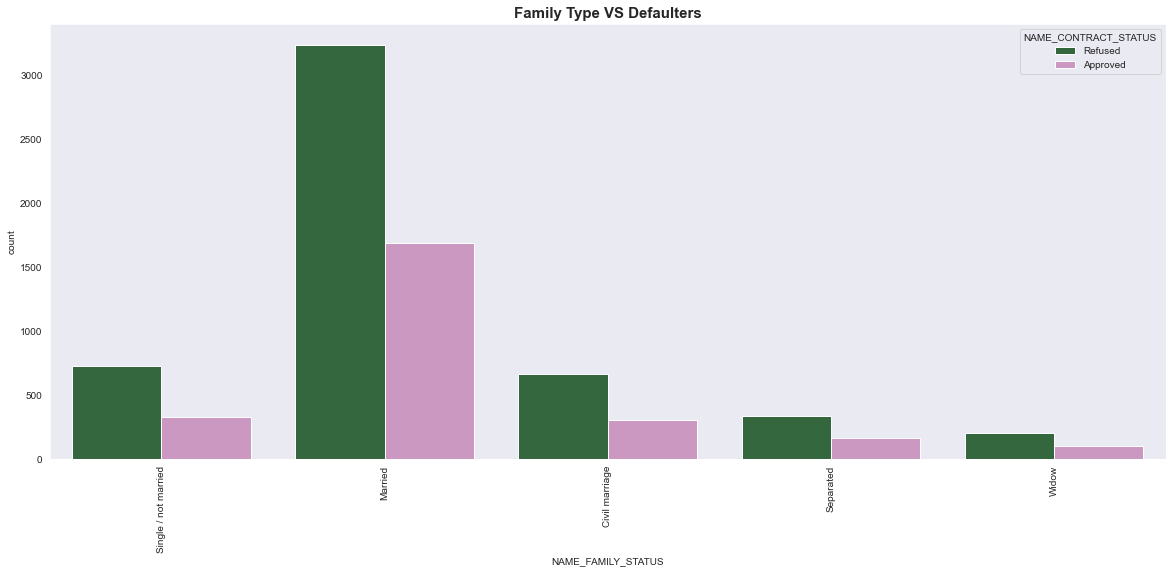

In [181]:
#Graph between Family type and Defaulters
plt.figure(figsize=[20,8]) 
plt.title("Family Type VS Defaulters",fontsize=15, fontweight='bold')
sns.countplot(data=Final_dataset[Final_dataset["TARGET"]==1], x='NAME_FAMILY_STATUS',hue='NAME_CONTRACT_STATUS',
              order=['Single / not married','Married','Civil marriage','Separated','Widow'],
              palette='cubehelix'
             )
plt.xticks(rotation=90)
plt.show()

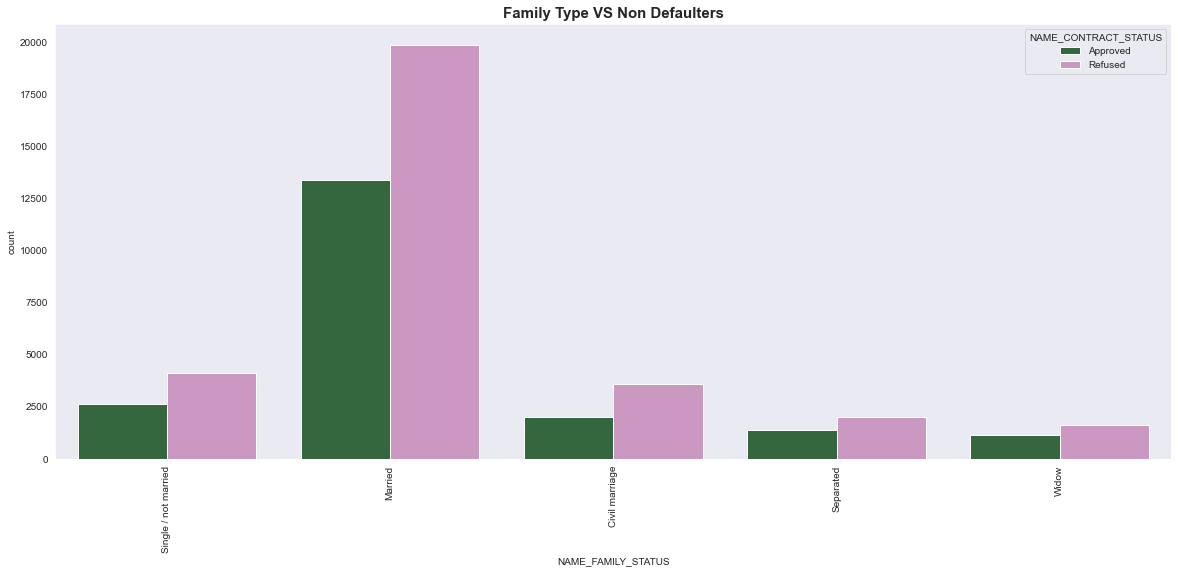

In [182]:
#Graph between Family type and Non Defaulters
plt.figure(figsize=[20,8]) 
plt.title("Family Type VS Non Defaulters",fontsize=15, fontweight='bold')
sns.countplot(data=Final_dataset[Final_dataset["TARGET"]==0], x='NAME_FAMILY_STATUS',hue='NAME_CONTRACT_STATUS',
             order=['Single / not married','Married','Civil marriage','Separated','Widow'],
             palette="cubehelix")
plt.xticks(rotation=90)
plt.show()

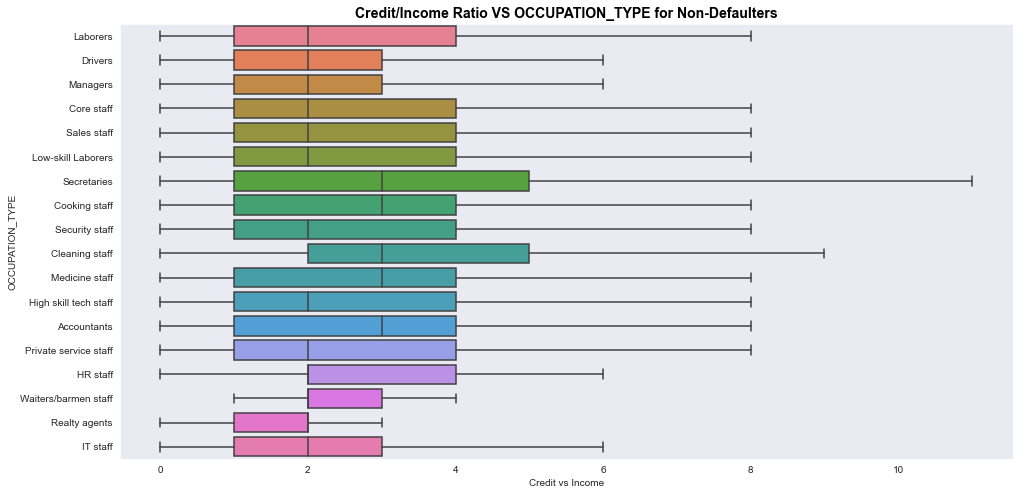

In [183]:
#Credit/Income Ratio VS OCCUPATION_TYPE for Non-Defaulters
plt.figure(figsize= (16,8))
sns.boxplot(data=Final_dataset[Final_dataset["TARGET"]==0], y='OCCUPATION_TYPE', x= 'Credit vs Income',showfliers = False,
           palette="husl")
plt.title ('Credit/Income Ratio VS OCCUPATION_TYPE for Non-Defaulters', fontsize=14, color='black', fontweight='bold')
plt.show()

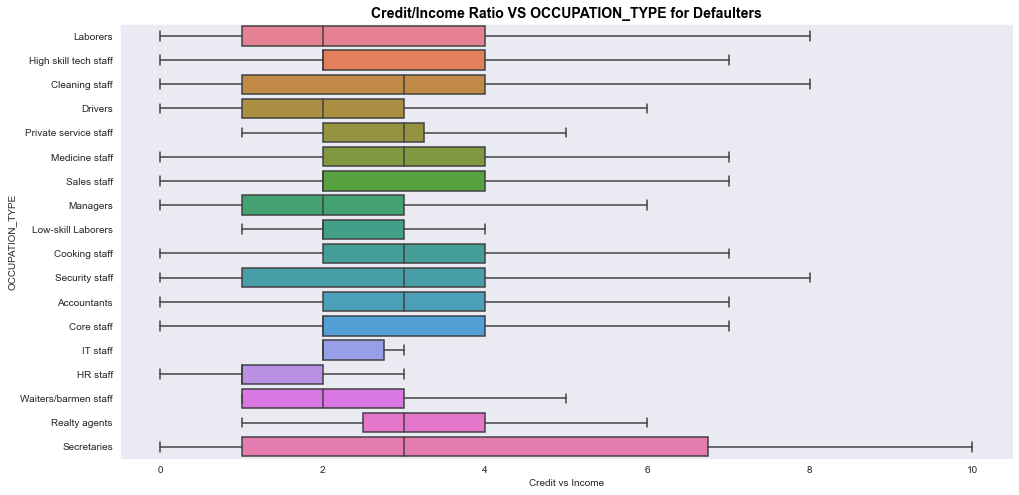

In [184]:
plt.figure(figsize= (16,8))
sns.boxplot(data=Final_dataset[Final_dataset["TARGET"]==1], y='OCCUPATION_TYPE', x= 'Credit vs Income',showfliers = False,
           palette="husl")
plt.title ('Credit/Income Ratio VS OCCUPATION_TYPE for Defaulters', fontsize=14, color='black', fontweight='bold')
plt.show()

In [185]:
# Correlation of defaulters with prior approved loans vs defaulter with refused prior approved loans
defaulters_approved=Final_dataset[(Final_dataset["TARGET"]==1) & (Final_dataset['NAME_CONTRACT_STATUS']=='Approved')]
defaulters_approved_corr=defaulters_approved[['AGE_YEARS','AMT_INCOME_TOTAL','CNT_CHILDREN','CNT_FAM_MEMBERS','AMT_CREDIT_x','AMT_CREDIT_y']].corr()
defaulters_approved_corr



,AGE_YEARS,AMT_INCOME_TOTAL,CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_CREDIT_x,AMT_CREDIT_y
AGE_YEARS,1.000000,0.014739,-0.357188,-0.332756,0.115751,-0.041832
AMT_INCOME_TOTAL,0.014739,1.000000,0.002330,-0.004336,0.269069,0.227866
CNT_CHILDREN,-0.357188,0.002330,1.000000,0.883205,-0.035934,-0.009022
CNT_FAM_MEMBERS,-0.332756,-0.004336,0.883205,1.000000,0.002636,0.033690
AMT_CREDIT_x,0.115751,0.269069,-0.035934,0.002636,1.000000,0.231948
AMT_CREDIT_y,-0.041832,0.227866,-0.009022,0.033690,0.231948,1.000000


In [186]:
defaulters_refused=Final_dataset[(Final_dataset["TARGET"]==1) & (Final_dataset['NAME_CONTRACT_STATUS']=='Refused')]
defaulters_refused_corr=defaulters_refused[['AGE_YEARS','AMT_INCOME_TOTAL','CNT_CHILDREN','CNT_FAM_MEMBERS','AMT_CREDIT_x','AMT_CREDIT_y']].corr()
defaulters_refused_corr

,AGE_YEARS,AMT_INCOME_TOTAL,CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_CREDIT_x,AMT_CREDIT_y
AGE_YEARS,1.000000,0.065553,-0.284772,-0.233768,0.110153,-0.001926
AMT_INCOME_TOTAL,0.065553,1.000000,-0.031345,-0.039383,0.342257,0.323829
CNT_CHILDREN,-0.284772,-0.031345,1.000000,0.887555,-0.001228,0.021963
CNT_FAM_MEMBERS,-0.233768,-0.039383,0.887555,1.000000,0.026565,0.035971
AMT_CREDIT_x,0.110153,0.342257,-0.001228,0.026565,1.000000,0.193731
AMT_CREDIT_y,-0.001926,0.323829,0.021963,0.035971,0.193731,1.000000


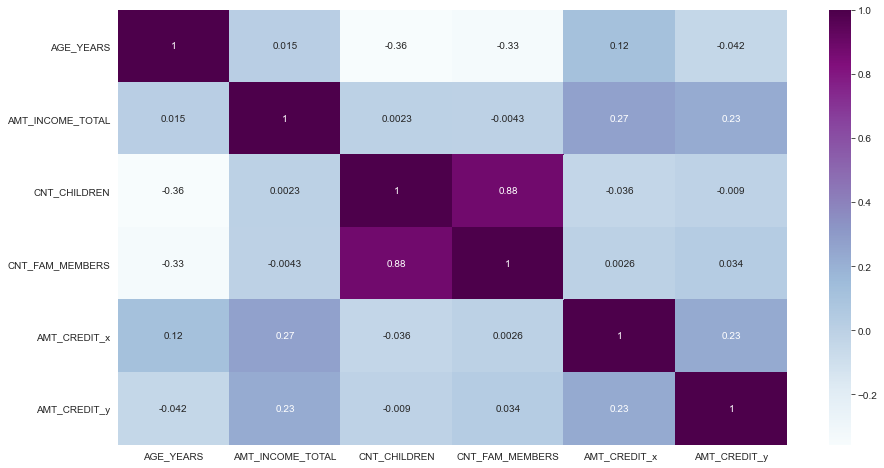

In [187]:
# heatmap of correlation for defaulter with prior approved loans
plt.figure(figsize=(15,8))
sns.heatmap(defaulters_approved_corr, annot= True, 
            cmap="BuPu")
plt.show()

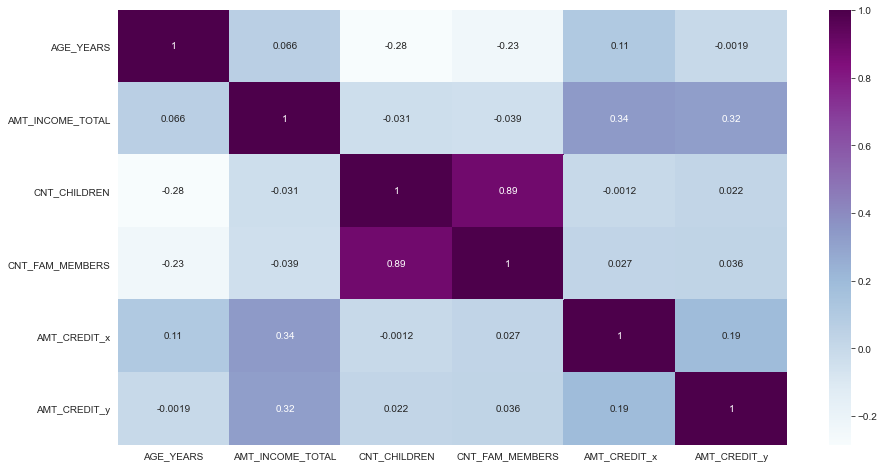

In [188]:
# heatmap of correlation for defaulter with prior refused loans
plt.figure(figsize=(15,8))
sns.heatmap(defaulters_refused_corr, annot= True, cmap="BuPu")
plt.show()

In [189]:
# Correlation of non-defaulters with prior approved loans vs non-defaulter with refused prior approved loans
non_defaulters_approved=Final_dataset[(Final_dataset["TARGET"]==0) & (Final_dataset['NAME_CONTRACT_STATUS']=='Approved')]
non_defaulters_approved_corr=non_defaulters_approved[['AGE_YEARS','AMT_INCOME_TOTAL','CNT_CHILDREN','CNT_FAM_MEMBERS','AMT_CREDIT_x','AMT_CREDIT_y']].corr()
non_defaulters_approved_corr

,AGE_YEARS,AMT_INCOME_TOTAL,CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_CREDIT_x,AMT_CREDIT_y
AGE_YEARS,1.000000,-0.037820,-0.379170,-0.346752,0.048479,-0.059758
AMT_INCOME_TOTAL,-0.037820,1.000000,0.011942,0.016895,0.387661,0.314316
CNT_CHILDREN,-0.379170,0.011942,1.000000,0.876207,-0.008346,0.035487
CNT_FAM_MEMBERS,-0.346752,0.016895,0.876207,1.000000,0.048940,0.069944
AMT_CREDIT_x,0.048479,0.387661,-0.008346,0.048940,1.000000,0.256705
AMT_CREDIT_y,-0.059758,0.314316,0.035487,0.069944,0.256705,1.000000


In [190]:
non_defaulters_refused=Final_dataset[(Final_dataset["TARGET"]==0) & (Final_dataset['NAME_CONTRACT_STATUS']=='Refused')]
non_defaulters_refused_corr=non_defaulters_refused[['AGE_YEARS','AMT_INCOME_TOTAL','CNT_CHILDREN','CNT_FAM_MEMBERS','AMT_CREDIT_x','AMT_CREDIT_y']].corr()
non_defaulters_refused_corr

,AGE_YEARS,AMT_INCOME_TOTAL,CNT_CHILDREN,CNT_FAM_MEMBERS,AMT_CREDIT_x,AMT_CREDIT_y
AGE_YEARS,1.000000,-0.007133,-0.346233,-0.318960,0.099853,-0.075289
AMT_INCOME_TOTAL,-0.007133,1.000000,0.014344,0.012103,0.358504,0.311671
CNT_CHILDREN,-0.346233,0.014344,1.000000,0.884212,-0.019829,0.039700
CNT_FAM_MEMBERS,-0.318960,0.012103,0.884212,1.000000,0.019675,0.063656
AMT_CREDIT_x,0.099853,0.358504,-0.019829,0.019675,1.000000,0.244179
AMT_CREDIT_y,-0.075289,0.311671,0.039700,0.063656,0.244179,1.000000


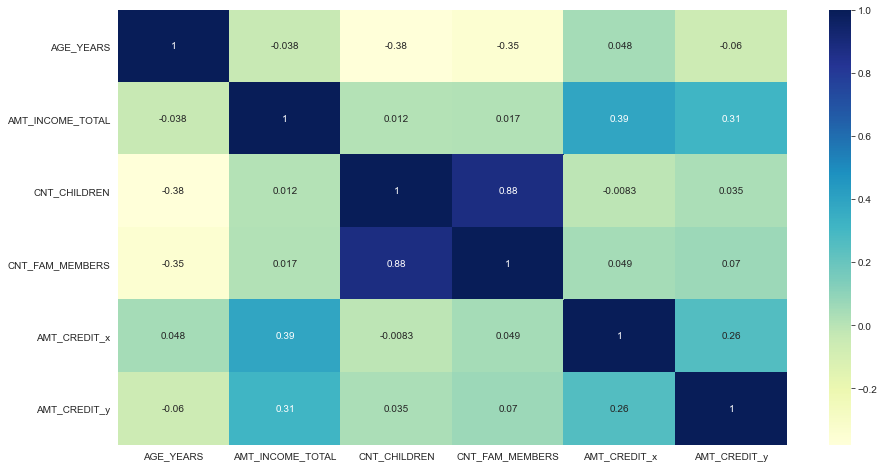

In [191]:
# heatmap of correlation for non-defaulter with prior approved loans
plt.figure(figsize=(15,8))
sns.heatmap(non_defaulters_approved_corr, annot= True, 
            cmap="YlGnBu")
plt.show()

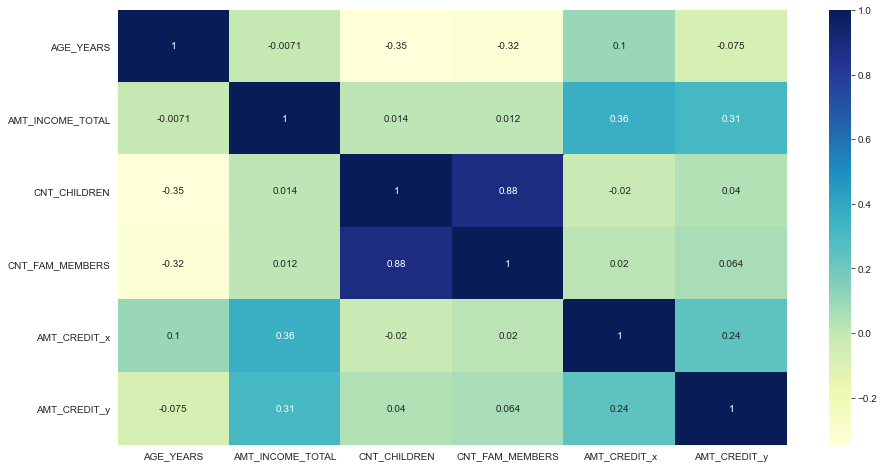

In [192]:
# heatmap of correlation for non-defaulter with prior refused loans
plt.figure(figsize=(15,8))
sns.heatmap(non_defaulters_refused_corr, annot= True, cmap="YlGnBu")
plt.show()

In [193]:
Final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59413 entries, 0 to 59412
Data columns (total 59 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   59413 non-null  int64  
 1   TARGET                       59413 non-null  int64  
 2   NAME_CONTRACT_TYPE_x         59413 non-null  object 
 3   CODE_GENDER                  59413 non-null  object 
 4   FLAG_OWN_CAR                 59413 non-null  object 
 5   FLAG_OWN_REALTY              59413 non-null  object 
 6   CNT_CHILDREN                 59413 non-null  int64  
 7   AMT_INCOME_TOTAL             59413 non-null  int32  
 8   AMT_CREDIT_x                 59413 non-null  int32  
 9   AMT_ANNUITY_x                59413 non-null  int32  
 10  AMT_GOODS_PRICE_x            59413 non-null  int32  
 11  NAME_INCOME_TYPE             59413 non-null  object 
 12  NAME_EDUCATION_TYPE          59413 non-null  object 
 13  NAME_FAMILY_STAT

In [194]:
Final_dataset['AMT_APPLICATION'].value_counts()

135000.00     5975
225000.00     5719
450000.00     4490
90000.00      3355
675000.00     3343
              ... 
824531.58        1
1071000.00       1
886500.00        1
1764000.00       1
3145500.00       1
Name: AMT_APPLICATION, Length: 456, dtype: int64

#### Analyzing Refused/Approved loans for previous credit/income ratio, application amount and classifying based on defaulters and non defaulters

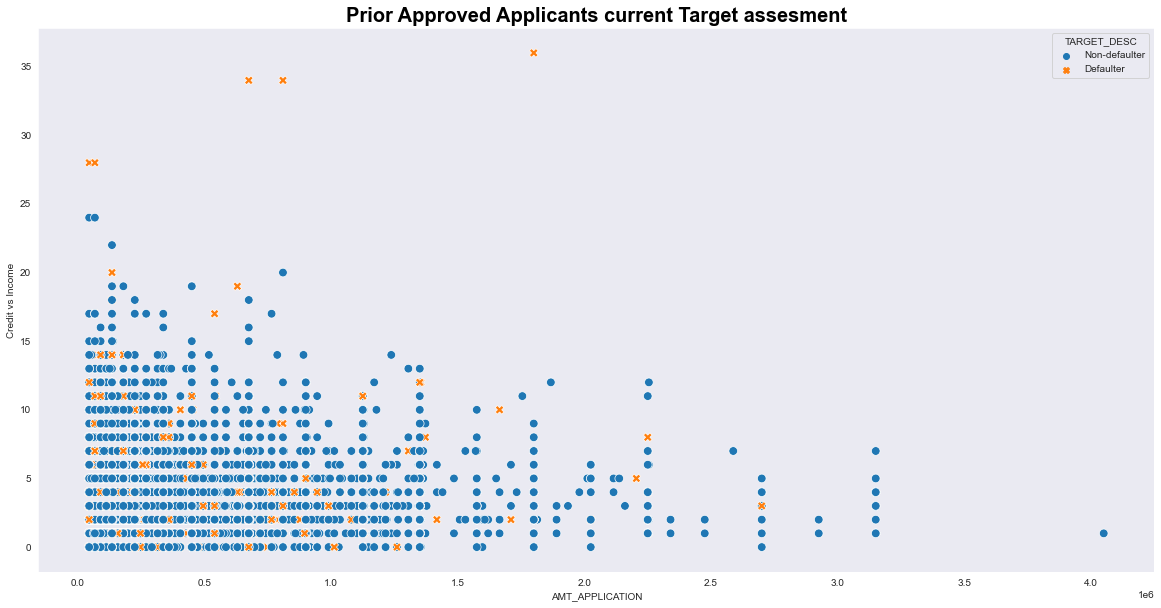

In [195]:

Defaulter_df=Final_dataset[Final_dataset["NAME_CONTRACT_STATUS"]=='Approved']
plt.figure(figsize=[20,10])
sns.scatterplot(y=Defaulter_df['Credit vs Income'], 
                x=Defaulter_df.AMT_APPLICATION, 
                hue=Defaulter_df.TARGET_DESC,
                style=Defaulter_df.TARGET_DESC,
                s=75)
plt.title('Prior Approved Applicants current Target assesment',
         fontdict={'size':20, 'color':'black', 'fontweight':'bold'})

plt.show()

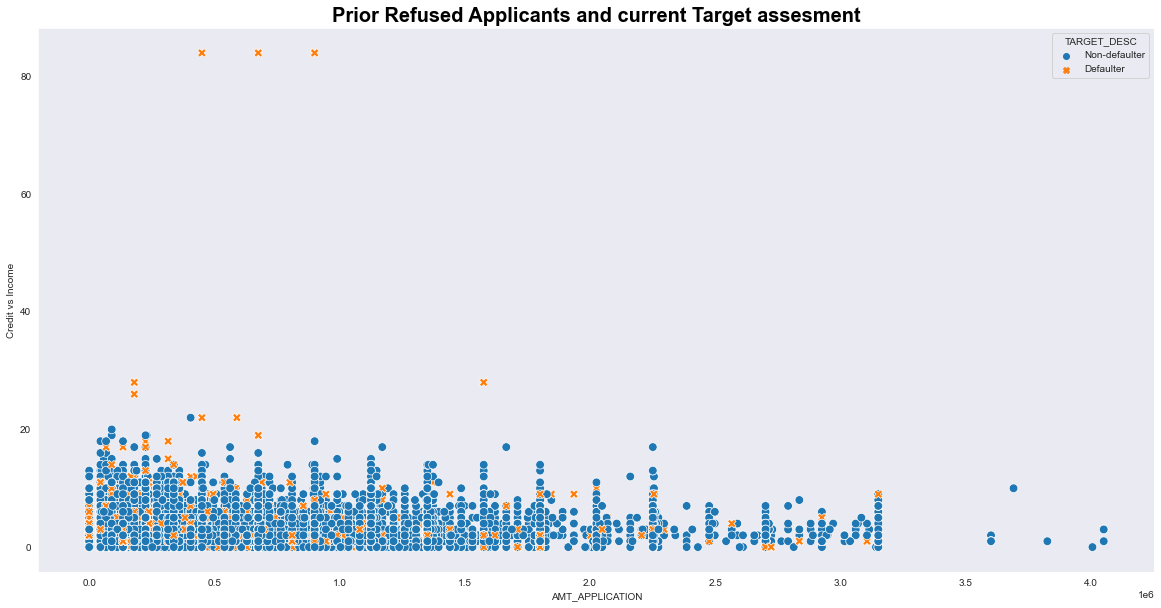

In [196]:
Defaulter_df=Final_dataset[Final_dataset["NAME_CONTRACT_STATUS"]=='Refused']
plt.figure(figsize=[20,10])
sns.scatterplot(y=Defaulter_df['Credit vs Income'], 
                x=Defaulter_df.AMT_APPLICATION, 
                hue=Defaulter_df.TARGET_DESC,
                style=Defaulter_df.TARGET_DESC,
                s=75)
plt.title('Prior Refused Applicants and current Target assesment',
         fontdict={'size':20, 'color':'black', 'fontweight':'bold'})

plt.show()

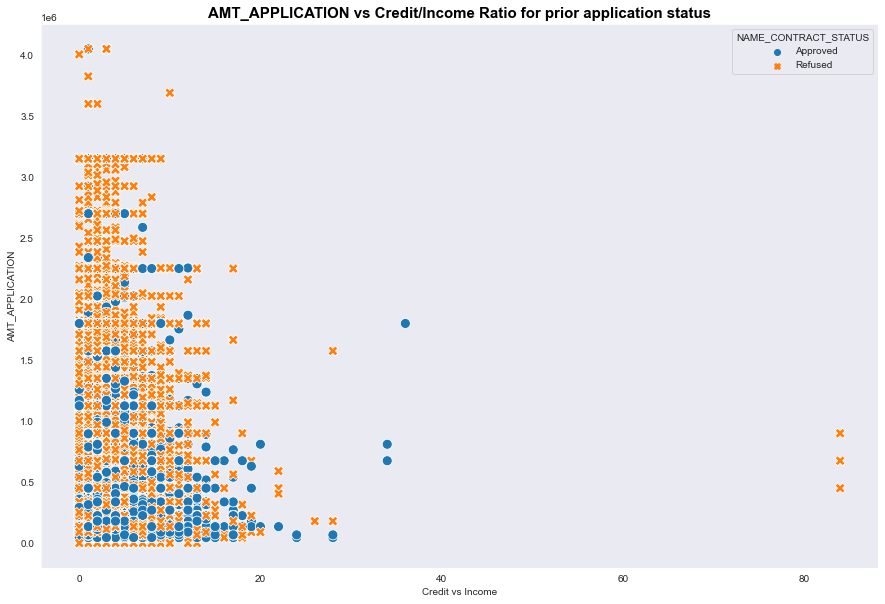

In [197]:
plt.figure(figsize=[15,10])
sns.scatterplot(y=Final_dataset.AMT_APPLICATION, 
                x=Final_dataset['Credit vs Income'], 
                hue=Final_dataset.NAME_CONTRACT_STATUS,
                style=Final_dataset.NAME_CONTRACT_STATUS,
                s=100)
plt.title('AMT_APPLICATION vs Credit/Income Ratio for prior application status',
         fontdict={'size':15, 'color':'black', 'fontweight':'bold'})

plt.show()

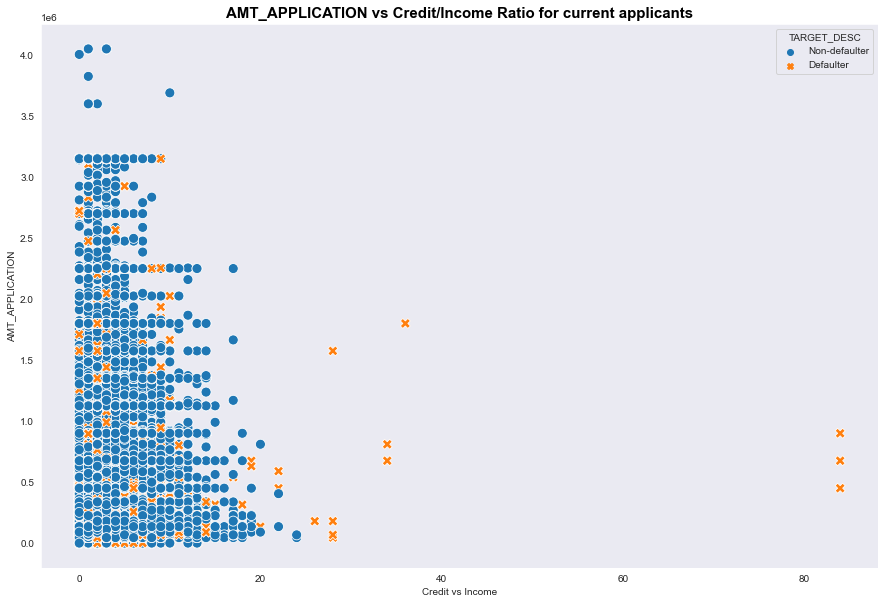

In [198]:
plt.figure(figsize=[15,10])
sns.scatterplot(y=Final_dataset.AMT_APPLICATION, 
                x=Final_dataset['Credit vs Income'], 
                hue=Final_dataset.TARGET_DESC,
                style=Final_dataset.TARGET_DESC,
                s=100)
plt.title('AMT_APPLICATION vs Credit/Income Ratio for current applicants',
         fontdict={'size':15, 'color':'black', 'fontweight':'bold'})

plt.show()